# コミュニケーションと情報デザイン
> 学んだ情報技術がどのように社会の中で利用されているかを結び付けて考える必要がある。これは，菓子メーカーの工場における不良品の判別に利用される画像処理（画像を白と黒の 2 色のみで表現する２階調，明度と画素数等）に関する問題である。 （[共通テスト「情報Ⅰ」試作問題](https://www.ipsj.or.jp/education/9faeag0000012a50-att/sanko2.pdf#page=10)）

---

## 問題文
　次の文章を読み，空欄 [ ア ] ～ [ ウ ] に入れる最も適当なものを，文の後の解答群のうちから一つ選べ。

　ある菓子メーカーの工場では，出来上がったせんべいを袋詰めする前に製造ライン上でカメラ撮影して，割れや欠けなどの不良品の検出を自動で判別する装置を導入している。装置は，割れや欠けがあるせんべいを判別しやすいように撮影した画像を白と黒の 2 階調に変換（二値化）して処理をしている。図１は写真１の画素を明度でヒストグラムに表したものである。二値化を行う際の濃度変換の分かれ目となる濃度値（しきい値）を A と B とした場合，しきい値 A の時の画像は **[　ア　]** であり，しきい値Ｂの時の画像は **[　イ　]** となる。<br>
　また，この装置では割れや欠けがあるせんべいを判別しやすいようにプログラムで自動的に二値化のしきい値を決めている。図１のように，明度と画素数のヒストグラムにおいて二つの山型があった場合，最適なしきい値は **[　ウ　]** と判断することができる。


| 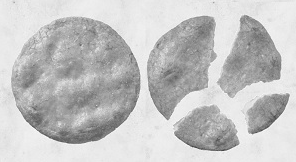 | 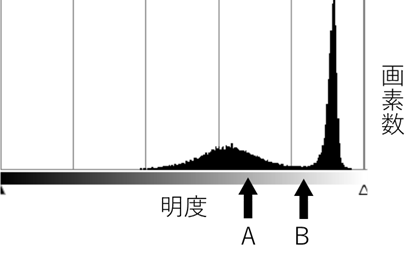 |
|:--:|:--:|
| 写真１　せんべいの写真 | 図１　明度と画素数 |

---

[　ア　]・[　イ　]の解答群

||||
|:--|:--|:--|
|0 <br> 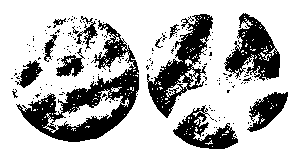 |1 <br> 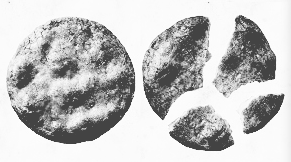 | 2 <br> 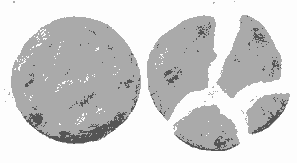 |
|3 <br> 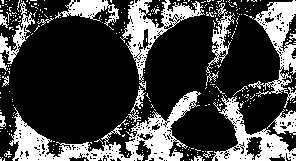 |4 <br> 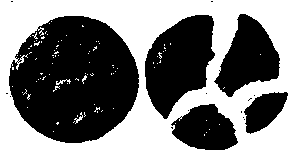 |5 <br> 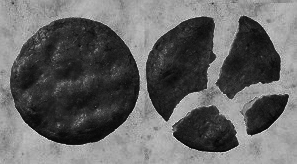 |

---

[　ウ　]の解答群
0. 低い山の最も画素数が多い明度
1. 高い山の最も画素数が多い明度
2. ヒストグラムの中央値の明度
3. ヒストグラムの平均値の明度
4. 二つの山の間の最も画素数が少ない明度
5. 山に関係なく画素数が最も多い明度

---

# シミュレーション用プログラム
- 前処理を含めて「ランタイム」から「すべてのセルを実効」した後、スライダーを動かして確かめてみよう
- 「しきい値」「コントラスト」「明度」それぞれ変化させるとどのように画像は変わるかな？

## 前処理

In [1]:
!pip install opencv-python
%matplotlib inline
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def img_base64():
  return 'iVBORw0KGgoAAAANSUhEUgAAASgAAACiCAYAAADyW1ATAAAgAElEQVR4AYTd+ffvU9nH8fPPqpbqSKhIxiSaJBo0mCqiRBooRNE8SJNKxiIKjZZ+et/rsdf9/KzrvH3Pff+w156ufY2v69r7/fmedOzZZ5/dnnvuue0vf/nL9vzzz28vvPDC6p955pnNnl6zb++pp57a/vCHP2x//OMftz//+c9r/qc//WmN8dHwid+TTz55oIuP/TnGt2avhn/64WvcHE3zSWeNPvScsh977LHtiSeeWK11OqBHa/z000+vZownPvbJ+utf/7p0TKY1Nk6b2YDub3/722vaSy+9tGkvvvjioaEz18d/7wf88+Xs6dE8X+QHe8bOFi+2s689+5N+71+849+Z5np6kquf9k47jJvHX6+Rnf+nL5ObrPyht9b52c844aW1Rkb6zvPpNX1gjK+zzoUL81r0eEVPHt/SUTzRvvzyy2sevTVn9PxJjnN659DlDz06vNDC6+9///ulDzp76anHV4sfmvi1TkY6oGO/PXT2rJlPf5GtWU/nxnPdmP3JJIfv1IjHH3/8NX4kQ3MGHfqwaZ1N+eUYxVKuxRxGoD3rlAByjvrFL36xGsdZ02OMHm3G6wnGgxIa3tbRMfZkLZn1eGt46OnTWn1rdKFTxk9npW/OQWsNjbE2ZZCfzvr0Np66R1PRqRCVvBWoilGFKTo+mY3Ppjzz2dhKl9boYl5rny1sy25+mfbls+jxSXZjPO0nS0/X+myib2eNa9biMfWjh3m6Tx2im/yMo41fc2c7bw8m7O1lWNPi5Qw9rTnjrD02hZ9khbNo0FnLfnP8+FhLfjqgI0sv7uli7hxe8ayX4C7XX/7yl9tvf/vb9Tigl5a+9Mkm4/TEk2y8rLeHFv7FMNv16dl5vbX6xu3LlWTYo+vMqwoUX1gvv4y1+OKh0csaPenML8dKCps2KGrNuIOc0ZgS3/72t7cvfOELS0gK2Y8xHsZ4UoowBuRYa87lHLS19DBP2Qypd974qEZOjkim5OQsLz/jaNjCefXxr6cD3TV6acb0bj1/8VnA2xcj60etdcZ+caiPb3L2Pd0Kqr3pt/byjzn7s7V15+cYD3KzL3v1+z16TtqpQ+fCxNQnmWJgHW379vBJvnm8kjXp51489DX78cx/fG2dfP6Ah+Jd0jifPOfiZ8xufbo5Y4yPQqJdf/31249+9KOFwzCPR/o2pgPZ5uWEvnxLV33y0sEZZ60XQ2vm8TXGL5q5Vx7wwe9+97uVGx4fyWeHvfRnpz0t/nRRaPmEjuSHi9nb6yIuD/R8jE4zR6eZozdeLyiEM5jmGUUoheopKtEZYD3Fcw6lG6dkRpDBYOfwn7Tm9gOGPjpOIWcPpOkwtNGhNUcvEAGR3ooROmuS1n402ah3ln70SE/65dD2cmYO1ReEaGeACgI6vKPJbvPGaJNfn1y60FM/mzUtMOYH8eJ7vrGfbwN3/sdfi2dz/dR1jqNPdmfxPKolMz3nHC+24t+4eT5wrviQhS7ZaJLfunky2ocBuumdTdbEarFyJv54GfNfY/hBix9c/epXv1qYwhudllw9OjziX5zTh67Z0NgeHfOLeTaRE+bJMrfXWnN6Gmvo6Cof4KJcsNbefi2ZdE8fY7qa0419emvTPmO+nQ1d/vZJjEbuzPVjHcSQYgRplEbIKdY1BtesA72qy0j7DLfOOXrKF1xz4wpERpJlnKHRkY2ndXwrbI3TsaSjl3HFxpgeek4vGHTmeHqgzR49HzijJ5e+9DFPL/6iW4HIfzm+4mRur/05bi8e8TOvkedMc7219NDTq9ZeutOfLfkge/nPGt+2n+/jVT9lGdOzlr3myZ59PPD+v1q67HGQnPrszz70xs6Tmzzj9pxtPdygn/bOubN87gz/NJ9r02/o6DV5w5Rz+HqZwBvs5ff0QaOZ0zc+6MlIvr0avcME21pPPgwbJ6tiE8ZhoFxw1vrME3nhM7IcSW90+cy5YqFvnR0Vl3TUa2Fl5oY1NkSjb67HW78+8WxyFuF6mxlPAc7WWiuonMgIcwpyjPP6lNeb2yeH8RmccTNQySlw9pKTQ8mkS3N9YwApGfFy1jynK6g9ZZ3JFj1Zejpr5nTUzHOiMeflUOsap7sJBKJ5QZk0BSce+mTWk916dNY0NPyjb611vb301vMXW70g9eb8EpDR7/mQuedJXrpkY3STh3FYmrqEn3TDvzV0ncvf0xfWotU3Fy++nXoUw3zRHnuzOR+inTqibc843ukXT+em/viml7G9LkDrye0cfsmxBhN6OE0WG5Nnzb5e7Kzb18wVGrHVktWauRyw1+VsDw9YUEjtywvyjfHU0j1ZdCguU0/6W8/X+U1vrzzQm7duLGeca0+PF5pjCZuOoEyK6dFQjIGUspYBjGckg9HhYw+dud4aBdB2Di88yUJnP3r8k9EYbXIEvnVreGkcLABk0AeNHo31+mTTJz7OkJEfzBvr6ZaeOZ9zc37jek6eQWjd2mwFlIzkWJstPdIhn+avOS92s2cvW/lNzyd6NDV+iE/yzJOZbvrG2bS3YdKkR76ePjbW7JFFB/KciUe9/XRNT7T2zeda6/RqvN9vz3p8rRk7Y72z1unJ3nCCzji/NTa3FyatKwB42dPw09N9yiOz2JDnrDX0Gh7o7TmvN+c/rYI4eRhr9ipSaNNXXtircBnj2T4Z6ZJc+/TS2EAvmNbP4sJf5rXwomfPnM+caIxmfeIZzEATTIkU0VMczaRlhD2FYSosONYLgDHlM9A+fsmxntOiJWfuCwh5aDncnnnJZ031V4Si0ZtrgoOm2yHe5KELUOltP1v1nFbPseY5vr71HPz/9fjxS77Xm1ufrX17Gt2iNW5ujf58pc+n7M/2/IUmOrQ1PGpkZXd66ZOdP6YdnaVTuvBvbcqMV3GlW/tH2W8vPnrn922em3vpNXVPRzbyFf4whCa79Z1NX3YZ08FYz7/RJYM99iV/MUIrHubkRWtuT3MOjbMa/xRLZ9Cy0zga58oHvb3mzsq38oOu8ezitk+m3ln80jHeevKsZ+vex3KBbvwmH2Zu7AtS+VLMnKlZw3t94hkQmrH1jGjs84BSlGQw+hzBcHSY50h0+CbIWQ7g/Pg2tzbXc64z+JqTh6c2wUAGmn0C4q11M8wCRVYy9LNlrzW86ZAdjXNiDp9BsDcdnv3x6Oxcx7eGLtp6e+w3N6ajeevttd9edomJFjCtO8uX8XKmhk8te8zpPOVHky32avjGX4+33j759mdvfz+ffO07U0Ob/KP6dE3veEWbXfjSiW/oBy/ZgEaMzZM79QzH8ARf2cbXxtbx1ejrrCZf6KORgTfZ8IoO3+IVjzBrH63mnHlyjbPDHlsnb8UnffCnM12st6cnC3+6dp5OybROZvrnW+v92H2y3JhFqRjMmOzXTlqgcgQFczZGlGQcZXIkx1rHPMPso3c2Z2UUGo7Cx5isGlpn9bM5i9YZTkTjTOt0sGctHsDWXxztc7xeIz8ezuA9g0B3+1oOjK/5BFjBmM5vv+DNM0ftJWP25LFPo0d969b2OnU+Gc7k2+zLR/XxRrvXcwIGTzRkJtf8qIZn/Ke++E95k19YsDblot+faZ69+vTIhvp4FQu9NfEyTi6e2aVHEw/Ywh8tOr6Mlp3m6I3R2oMz9L4w7DkPg+TaT2fj6Vvn0RUv/ZSHXsMvH+u18sp+eoZ7ujjTecVJU6j2+ZE8tPg6qyUPH/ynDfbzmXXjcsO4VhzMG+vnfuuHAkVgbQYqJ1GsYKVwexzAEHOvCfuE4ZNDMoRg+4KgMSpn6ps7lxxr8bHGme3NIFib64LF+QpVsvCir5adU77z5ulLLp01Y206snHFyTz6/BXN3EPT+qR3pkbXfKif+qJpLRpr9Ou8Pp/ixTYxqtmrdS5d6rMrfZOLfsrHZ+qRbOto9Z3Va+zXT17RJ0/fvr5x/NJTH9/O5u/W9XPPnH3W9HgnP1pr+PCdvjm6iTW242NNaz+cN08Xc/T5LL7mzs9zndXX0lVcxdO5xmE9XazDu9759ns56a2hx2vS4ltLD3Pytekn+33isS2/8m04KibZa75vndWf8CN5QilAmD6jUg6NcXMGGWcYYc5El2LmOQa9dYUmx+Qcc7xyrjm65ODTLYEmXY3xRd+NQA+0FajorWeX85yck4zjGZjay3E5fPZo2q+PLzqB00+6+LaGnn01OqYL24xr6Vbfmfp45cd46VvDszG+8Zp9urGpcTLSRY+XZq/z8bdGrp68qZt1dHiQEW9r/GUt+njrT6Yv2vy/17fz2YIWjdjoNTjr/F4umemX38KlOZ3N0WmwiF4Ph52PdtqnKOQHcvkF7osXvsY1PPCNt7PxxUszx0tzXrMuH6KpSHUWn2TS19mT+aN1doTtv//97yf4dO7lY+fwbT5p4qm3vwpUAc+xeopqGGHAgLnvsDmjC0KG5UT76OxnqDle0dojJ4fZa80Yf8G174w9Y4GpcMXPfkFwxlzvGYu+8+TRLWfQzTw9zTVzLWfVF4x90emcftIWgM5NuXNMFj3yPbumbel4lP6djSb9nbemR8MHnY+/ub3OzDH9skvszJNRv5fdPDvQNU5WNGIpRmJpD20+qU++vjX91Bc/7SjauRYPttTiZU4Hc7zMs9G56S9+bA+tPTSt4TExx75ojJ2ZtuYX56zzSfY4F+aN8xOsk2HPuL1yBo/W0qU9PKy5zDVztGQba/mNTrXW0j97+coejNszD/ft2Y+Pvv3Zo7UX7eETj6B9Y0wKqLQOE075mJgzzF5B01uzRzgezuids483x6KhTGfsO+u3o86Yo+dQa3pr+wAUqIKADhgUKGtkkIUHufQxr5Gt2dvT5Dg9m9C15nz89O3NAta5eSbfzvPksk0zpjO7tHSyZ915bX+GDvFEiyb/8gdfTBn284GznbeWvmxit3k09cnCx1o6zTkaeuqTp882vT2NrGjMk1M/6eZ+Z52fNHTOjmiai5E1P+7ib1xvj85o04fv0m/iif7onO0MH6ezM+boJo31vV/wLUZoyUbTGA9FxRxP9NYa62HfunN6cddrchk9GV5TeJFhT58cuhnXzFubOtsPG/lTr1nn02lDMWif37R4JAPdoUCZaClHAYZirNmz5rA54+oZyzhrBdNZY+sZGK8cmCy9tRRzhkPRk9m+dXTkpI+xdY0eBcZYAdMrdv4tCn5kOJv+zuFvLZ70TjdO60xO5Fhj9Hjq8TG2Hh0ezkePjycwm9BkW2O24UE3e8b4sklr356xZp/8zujxs6ahRaNvjMbaPGOPvumsx4fu8x+fskGzR7/OkGWcXslvDa2WDcbpQ5d4dU6fjPayob36eNKLvHhYT9f22INGXEoIco76NCEvOmf6CxW+5tmQTHaQM+2yhr7LlHwFAt/OZ58erTN4zH1r+cMYP/FD889//nOdY8Ojjz56GNMr2fCDvvwwxoMu8kO+oc9P6KYO7dEhGvvGNTZNrKN1jo7kFS80zuRbdLPFX38MUZsYxJBwxqWkdY6Jxnq01lLCeo7o+Wi/c3ig1Vo3To41chUWfKIvcNY4NYM5UisQ3QhorNMhns7Q2Zzxzmg5JD/QhRPT0zgAO2ud35zLDvoa42EdXecAG088okeHB7p8Rhf7Gh70Z791/bQ1Ont46ItHujW3R4aGDz9o07f5RZ8/8NHyS332kaslR08WPfEnr7Wpg3U0bEivxvp0INs4OfayszXnjfMTn7fXOH3FYe5Zl9zonLdPpv7f//732vvXv/61aZL5kUceWf9VAS/y/jrcGefol+/SS2+NP+hOPl5dnMbOWdcXE74218fLHn/wHV727Zn/5Cc/2b73ve9tn/70p9f/WPkTn/jE9uCDDy6+ziRPISKzHk9zNDU8+SS59Nfynd48vZvzgXV8rDmvmWcLe9DZ19esTzno7R3+t3gROJiiOQGxNU421gjW53R9QUBLGKcoFPGcAEFPphbPAmDPWDPOwPoZoBylMAEOWZzrXDoKRsYnr710mD19nPG/S2KD//Gn/8RMt401stAAKtmcCewVMjrgaZ1O//jHP9Y8/fgqv9BFo7N142xtjS/SOb+zCV189NbInevR55N48iN5eHcWbb6iu7E9LR8Zo2sef72GJ9Dja67XyDVnB182zvbozJOXHdnqzFxzJh3xt6fRDW064skeTWzQwKPeXBESP/H86U9/uv5rBN/97nfXf7VDsl955ZXbhz/84e1DH/rQ6i+//PLtgx/84Hbrrbdud9111zrz61//etmFJ/31fKGHGbrSyV7+sEfHdDO2Rl/j7M53+s7iDVcPPPDA9uUvf3m77rrrtssuu2z72Mc+tl166aXbO9/5zu29733v9uMf/3jFgwyytXxOn3xIbnpbT1c6pId9Y7zQd8ba1N2cDA0NXvGY9vI9XtmafvFdP5LHXJ+CMZ09hyQ0MFgjvKLRunNo7QFCCrSWodbRWOcoPR4a3gXDfNJFgz4d0cYDbc1+coAQTbei/86OZAHKb33rW+s/JXPvvfdu3/jGN7aHHnpo+8pXvrJ99atf3b7zne8sENx3333b5z73uU1vH+2NN964QAIo3/zmN7ef/exnC+jk8qmi9corryzbBMOc/dkKvNmndy7bs8m6tdadnbFqTJ7GdmuaMT7JMN/zQzfP0dM8vvFqjgcazZhe6aRP78bkGaPVK2Bzbr8zaJJnnB/1jYtnPV3t4ZEdevt46801SSEedHC5+E+j3HHHHdvHP/7x7SMf+ch2xRVXrCKkIFm79tprt09+8pPbNddcs/b1n/rUp7aPfvSjq7/66qtXcbjlllu2L33pSwsLCh3dydaKnb51cecDOrHXupbtFVI0aK3Hj51o6Q+Pn/nMZ1ajs0a/d7/73ZtCSn86w3H+c5bcYoC3PT259Eyv9uzXrE1dzScdf08a54qVHm7qG5NXc5Zu6zeoFlOIYJsp0zincJIxp3lFTPocGGDxSHl75nqyjDPSGjn1+BvbN9bab95+62izwR7+aPu08ur5wQ9+sADpv2n19a9/fbv//vu373//+9vdd9+9ipE1xeemm25a+1/72tdW4IFA++xnP7sBomKmt28MBFp8/feygP7222/f3MSe4PRz49FL0aYbPSvu2cWGbIrGvDU9XrMFBmfzLTnxKkE6s+dXjOw7F8Dip0djT9988sdz8knP4oR3a8lPn/p0Jh/v9ME3muSb8ydeZKQTwLM3DBjj95///GfRK0jiKKnFWfFRiLxAbrjhhk3BMTduDY2XlFeTfUVAgWpdQbj55psX/Z133rmKnwJIBzGkM9voIt50pi9dFYRszV599kSfPeEFTzK9kujjdacgWbvgggu2Sy65ZO29733vW599n//859cly366FANjeuBLV2O8Z0NDPhp5H6319ujsTHaZZyf/w7y9mjWytOLdHj7OH/4dVBt6Am3W55j6AKE4aSnpDBr7xvFgdLwqFimA1tg5fQlZby1+xlOW9ebxj58Xkt+f3DCKj9fNF7/4xVUw7rnnnnWbeO0oKF5B9ryWNGNPZusK1m233bYBHRACream1Ox5QQGGfWedAX5FSoFSyMjyOeCsT0bFsoDRPTv5gd8AwLo5UGcXOvvN0QhuvrEXLzTmeOAXn9Ym72jzY3gIRMnA217zeuedtYcmfay1l9zo6CPOU3a8kxu/+NAZvT4+erwnjfOaF7Pfk2DBbzJiouiImQtFfMRcwXIB+Q1HcfLi0Lym0Elu57ywxNBn1FVXXbVo8bKnYClg+LiQ+JyuenbQj73NjStYxvbpjJY902/Z1hn7Chsd6EhXst/znvcs7CmiXlD0pNcHPvCBVcQUM5+BCpovB3lSQSIXT761phdHOpGvMMFtP2+YFzt6GeORDc7S05rWl1QFCV3N/sRNfI8sUDGk1HQUJcxr9gOKcUq2Zp4Ceuf0hHOEM/tmz3lnBdIZc30Gzx4/+wJtne6K0sMPP7yKgoLhc00x8dpRPNya1q35Pvf0BUJAA2BgBFR0vaT8VxIFHTi7Lf32AODOAbVzgAKsCtbFF1+8gE+O15SbDR3AeKUpjgqXVx2wsEUBZwPb3cB69vFLPtHzG3o2Czj/FIN65zT0sxi0hjeQ2dfImL6lBxnhwV4+bi+wzfVJ7zx9imO6WyPfPD2LsTNavI3Ti475wlo6w5Pz8bfunE93vpeoYtglIYZiK+7Ww4SLpYuo15E9MfU71Pvf//5FrygY94oSdy8VcffScqFJyOxmb3bqp63s1LIRLd2ztTG/ipfzaOBGwdTIV5wuvPDChVE6K150VLgUqHe9612rpzss+51KMfUXbq/L5Cvo+ZYccs35Fk7llz5d2FIc6Fr8jZ0zR9O6WM3Yxh+tls/YuT7xYhrB7CnogB7IKdKcwpKIotbsEYw2QfGyb5yz0Uw6680LDP7OTJnGkycjzIHB2O8/fhv6+c9/vgpTRUVhMVaggFUhcqMCElBZc4sqMoCp6Cg+wGru1aXQaUCu2Chsig+Aa8ANxGShcYM5DwRz39hZRdK+Ykg2ncjx47xPl25XfT7PF2zmLzYLcImZz6zvW361jmf88bamF4dkGSen2AQm831iFRd9Z4HRnGzy6Ie/vgJlj3w9vs7WyDMmyzj5eEx90ThPnmTz26Lio1goLrXiK37iq3iJmxhLaq9dMbGGFg9nxQiNZMcTZozFzKeVBkO9aPCmsy8MeuVT+ltnrzF77U3f5b98np3RFmtFgl4K40UXXXQoSPSzzhY6wyT9FDJFie7OeEkpaF5TLm+Fif/Sa/qcf+klhuR6kRoXM2cqPMYaej0+2WSOV3GOzty4Ob58dPg/TcCgliPMOQOxMUfl7ADVvr3WjGvOJTjh8cpo5zTrZOPJeONAjBaNHh9jPTnJ8EO2AuUvbl5GPtMARoDcdAoHUAmM4qH3yhFEBaJXld4LR9AEGwjtKzp4KkoADtAKCjDbV+zs+ewjK8AaK1IKJF0UKPT9hmXfXJ88Mv2bFi8qtvIHXxRIvVY8AgtfoO/3D2c6z6/AlW/1tWJcDJonh68BDQiLgX6C2NniPvfiaQ9fLd3pphXH5Ok7hz5+6AK8Pl2sp6OiI7YKjFhq/C8R/S7j5WtP3MRL4nrZKioVMIVJk+hiIqG9UsTUCwSuxNO5c845ZxUIsXWxkQUnLsAwyoZiwS7z7EtvtljTsgfdjK31fIbOhXn++ecve+nmpaQYwarfRtnMpl7uXlRo+EEu2M8efuLTftejF53gJp3s0wkOrEWDrljsx8VJTNPdOHpjfPDNXnQePqtA2SQMIQfozTE2d2j29vZr7VuPTzz1U2l8MyxeFHJOMxYUvX0Nf3ONwzLIuqTzlPfk9XLyI6BXFMAAFQD2EgK0QKhoKTRACIzAKsiC63er/nJXYXJOcZEAgOisHlCtG+OlcCkwxoCsdwsDiSJkD4gVRp945DZHS47fRRRIAHQLAw2/ATl/5CP+Ns5vChOfdMPlx+gEnf/Q2zMulvnaHh7NixX5mlja0zePRq8FYLxmw7eGR+PZo8fDGj7poze3blzisL8XNJ/xseIjJprXqpgoNPDAt9ZdEOKOvniaG1vr5RR2FD0vFUluTdwl9zve8Y6V8JLeHr7kea3zEV3zv7HGvjkuP+rzY+fYnL8qdGjJYZPflhQcdnUJs9elySf8AdsKEvsUKfZUuNiCD+zRy8XI1+T7Hc+435AmLtJz9vSauIieDWENfTT5o7iKJzp2nlCgEESUQIdbc0gDDEmDkWbfeozNjSlqTEHjFDWefPGjDB7oJU6fjfrkWmdU/1TAP5xTlPwlTkHycpLwXjCKkgIkWECkGAhGt6mxNXM/oCs2bj2FScHQu4GAu4KmV0gAUCOnH8kVlsCgMCpC6I2BnRyvpPQAJAAilzyy0NCLTLe5OWDhpSm+ChU/Fgf+UpT407oxP+VDvtXQNZ5zfJwr3sWoPiABaC1giaOGBn1jc7TxmP2Mu/Xme93wwI8dycETvbV4GsOD3xz5TPwlIN/zu0LCp14VxvwpEcUKrTiKC5+7iHpRlLzOwJK533gUKJ9IXt4+j7xe2pfk6BQCPMWPznxfbtB/nxv5j03Gc773i7N9NrqEYIc9cAWLenbTQa/BtT/4GMsJ9OyETY2/5Ig9vSKdDno6wImxWJws/vajQaegRdte+/xSXPmH7WSE0/y1CpTFWoCZ89YwcFAx8UOZPuXbQ6tZpww+ego0No9ej4/Eipe5IFhzztgrSVX339ZRjH74wx+ugACCzzFFxk2hgACGYCkaAKgHUo534wgeMGlA7bx/CoCHf3Lg5WTuMxEfwFUg3Lz4CzY6APeaQkOOTweyAUHhsUcmHYEYEHotmSueWj+Yk0M3ze2dTMXMWbyc51+JyV96/lLI+Snf2TMWL2O+N59+t1dMgKU48blGjjUgAyiA09esa52Lh3ngM54NTzL1jdORnsZ0TDY9yDVPX/tordnnZz4XN5/cErI/hihUFSz+E6d8aazoixtfix2/K2Jo0YmFV7fXkT/d+5zzWpHY1jVF69xzz13J7cXsDJ0UPZhlL5014wpsvucftmSPftKKW/nBB8bOyAm6V1RgG4bgjQ/oCPfsaK9XoZxwQXrxoVO09Aoy/Z3xW16xq9ikc4WnmBfv5mzobH2Yys7W8bTGL+yr54NjNg1saI0nANC0b9wZSYGZMwRMpazVKG3POeCmWLLQ4IFXa831zjlv/Jvf/GYVES8mSa1QuQn9E3/FQvPyCaRAq6BwuiY4bgnOFxyvFk1QBVSBUvisKXbk4EEGPoqDT67OASBeAKFoOeMmNwZwoLBHJzwUOHIBqqc2XpJDIqGnXyDHO8AAlHPmipvfp/gRePmObytI5sYVJn61z4fFjl9bn3ELROg0c/6vKO17wA2U+sYBmI541MKBvnE40ZPZOhskuHXn04ne1skSH0We77o8+JPv+FLzqhEPF4nWK0rydnk5WzHyKvLi8hl0xhlnrGY+f7c0VtTqIcMAACAASURBVKi8pM4+++z1FzIvK/ENd173/EBffsif2ZFdbGNz/st+dGJYPhg7Y46fAgWT7IEfDSYVXo2tdFR42ecyphs6Ly3n9Hyj0Z1PXNywJidmHSi2MMCuWnq3P/U3pqtm3J6e3c5kP7v4KtzC8SpQHGEjsAduzojpHMccA83Z6AhLmQQxxHlyKIS+ZJlBsK45p8fHWCGS9H5n8rJxO7o5FBaBUJgqGgKmYAkEgHG64ACwAqEA+fESvR/UvYT8uV8wFRFFpiInsILpBaNPnt4LSZMMipA1v335zFQ8BLx1wBBsa/1WgB+Z8acjsEgEBcjN5nYGIslmX+IAjwIm6fiFv/NhhclLqt+gpj/5UhyKhXOa2AUifYBpXfz2hSmQ6gPZ5BFY8TqqoU1++iQPvTU0YcgcLnvFuUz4hk/1Yq14i6H4uYz4ir/ti7eLC1bgR2FS2OBD409+dw52/K501llnbaeffvoqPr2S/BXMa+q888479D71/AmfLHrAjZj58z39KyjTPnFhU77mC/aicab94mdtrhu7DOmuCMMXvLEfpsiXG2zvd1AYYieMscNZtno5+XylvzVn2eTFCM/9E4QuIz1di8WMNf1rbGIf2uxsHmbqrVeg2OyseJ9QoBAEcg5AkKOOcmA0s9ikFIECQFlKNLav8uNtTZtBsI6f8xzQp5R/3OgfvwU0hUQgOFJQAE4wuiUEp886t4rPNcDspeV1VGHCS4D1wGWsAOKLn8KmEAme3pqCR4akENAKVJ8Ziguw4wUYdEULIG5aN5RzihSb9OZeVm5yugKOBCQPCJ1nI1utK2iKIR/zo6d//uRHTTz5U8vPaMQhIE3QTLC1PgtUoNwXqHjVA+Vs+MbbunG09cnT008LrM7Qwz/B8PmkgJd4LhA+dmHozcVZ8ikk/Ak7LqYuM/4TB7HFRzFToGBG8vpk02vi4HIwlrTO6b2e6KE4leCKnnjRg+59mrGF39mmFQN2sb94iJMLRi+/0NW35rwcEnt4hCW2kmuuQMMGTMI0zGgwSec3vOENy77jx4+vnv5s4gfn+IG9fMEeGCp+bIIBL9gwUFzpNWOZTdnOFvvo2K2fOGBf9pKjrQLVpJ5DEFcsKGgNQ8KME2SsWa8l2BwdJYwpRYHH/vf/ZIE8c3spVkCdEQAvJzef35584vn3Lf5HmV5JXkOKBMeW1JJdogOchAZAxUivAajPQ4FDiz/AC67iYh9PwQUygVeY8DMGAPwVH/tebIqQMwqatcAvUezRTeFRWATdXGHV08NZyUWOM3jq6S853GyAQ0cy0GlAB5zsKuBixW9ub/GbYBcLPi8u+sbFU+xq7RXPWaiAE1D9aG+MBo94mtOpJp5adOHCGprkG7cWD3Lhgw/4TLHmZ7+bmPMVH3pBFB/7EtKeNRedWPApPs6au5D41Nzl4dWkV3A0iar3GafY+R/geiV5YZmLI33EgTzxIls8+Uce8Um5xabssp7t7NeKWWeslV/2jPnbC1ls4VBjO5kuOj274cPYBa1nB9q3v/3t2+tf//plk9egYqxIoXeOL/RoFSg+EwM2FHe2FVN7xSw79MWeveyxlu31znUGf+N85cwxgdcsVmzqgZ1TcowDFRL05gmmDKEJS7mUcq61lMKDk/FwI+gFFJ2npR8wFSM/yCsybkFzhUqR0YBLMZGkPrG8lKxJcoHppWRNIXK7SHS935Oc81oBVvR4CbLzwOul5JwgAbo9tIqUIOoBXoLga+6MF5ObCNiB2SeCsULlttKAmQ6KJFlk4EMHY61ExJNcuiqWkkRhVqjcinQBWgWev/yPVStO4qiJz4y32Jjz+4ydcU0sxAswAbG5sTUNrVjGe2Ii4MbvqLk9fJ1PDt2suan9lsM+vmevIt9rx7rCz2d8bs6XYuWi4DdNbMTay9i6S6/EdRY/xY5vJaZLwQ/iklfPx5qXU0ntdyhzhclLimz6iRkdFO+ZD/mFD/I5G9HMOX+g4Y9yT8/HYoxWvvjEo7viRCa99fRQkOCFT/KbIuQVSF92+XxVcBUstrCrSxOv/KwAw6miRN/+yQsMaGJkj97FLbv01ums5Y/G9qMNP/rwtAqUiaYw9XIC6AqVNWNM0TWPYcJSMCXNAzJadNpUihw8Od6YsZLLJ51k9XLyUpLEXgV+e/DK8VuUF02/TylWnvDmAqKoCJ6CAZyCKHAcL8k1fNADKkA5A8yCoUAJMh3IdB6I9QKPVwlBBh7WyPa6Q+NGUkQ0gO8pDfCKlcCTp6jSkUzn6KjoAQjAsQNvNxtekkhCKHKKGFC5wQEMcGfs+p8liFmx5W9xCDgzXtYClbEmWSpGgXLOncfzKDzg5Xy8Jv+wgKezenzQxN9FIgZizQeKS8nDv2w35ztz/lCIzPlULMRWjJzFR6x6NTlrXWHBn8/5WBJ7HYnVW9/61vVDuTEf2+N7BcsLy1yRhJ8uGHLZEO75gb35OtvzTetsLzbFy6WjyRH/FYbyhTwYZANMsAFGYSEb6Gitud+f4MjLyMWpMLHFhad49WLiE3z4A0ZdpmzxexSd5yee4sTWcGO/cXFn32zZH505/myrDqE//AZlU7OpWnNIhOac5XAMojc3xmwqQ6BzGUMRACwAnbeGt88SieXzz3Pc6wmoFCeFxKvJnsArLoLhZnXOWi8iCe329PkGmJwrkIEZCBUeAPZ5pfChrzgAL4A7awxwzgis4tGrRiECDuc09OjID/BAowhJIucAAcABXlO0ALuXGT5k01kCkU0HPOmsaAEb0HmuK1LAZg2QgEirQBVDvle4+FmcxAyN9eIWUMSnsV4TowrGHLcWz2Kqx8d6PMJGfev4TbACuzWvP/5VnPMLP7GXL2GD3Wj4h918pYm9i8Q5RcqryZhf8RMfPMRGTJ3nW/Hqpesyedvb3rY+4xQmv9u86U1vWi8mND75KlISW+HDKzkuVraWH8bs1BrrK1DGfNIe39nTi6P46dHIA3gXcz5gO0woKGxTjIxhBMbQwRmb0WteUL3C+dRYoVWwwpY5Xvatw6MCVVzFf+KBvpo1ffZM25ythQFzfgk/fAar1k74d1AIEdkEYAVGM9asa72mYqpP6BRmnLL4UnqesWaOH2N7OSlKXkuCAFx9svjEE3ivJwD1e5TXB0B69egVIwUsoAAOAAqOoqZQBUpgVVgUG8UKmDX0goFOUpgrMhWJCoTAVVAkBBnkoQV4N1svL/qiBw63lKc1EEkSn33kOEuGzw92K7xehXQzt+esRAI6Y4UTuPCWMPgDoxsuUPOZcb4Ww0BT3Mzn2DywiU23pHjWKlCAFriKqbN4JAcN/nPNGH1A1ZPD7nzBdk2c2MWn4ljPr4qSHo1Per7Sw4/YasWcD9GKm3VzcVPs+bOkFJ8zzzxzFSmXyVve8pY1ltheVhJf8zuUhBZvvPBUNOE3+/jdWK/xQ2slcr7X88k8KwcVbP8g1R7cwycf0B0GYELs6cFPihYfWodHPoM1FyT8KsDsYi/8VcyswaXz8KQw8UsvR7npFUdv8Z8Y2Y+zTVyrA+yaOMgXe9+Eo/WCapJzKlAVI/0sVsYYdo7QGh4J7TakIHq9YqRCmlfoON6LCTC9aBQgf63xaSXYXkkc458ZKGL2JL5/SS6Bfd4566Wl9frwounmMBYkhctYIQNaveIG3DXrggsAAAfQ+Ag2MAgoQFvHy62l8AG9dXQC7Awa++iABx0g+e1CEtDJHr29HL0KJZzbvgSiI73pRydgUpTwdpsDngIFiGRqbOLfYmWsAXogEY/iZS2QtD8BVzHSV6D0YowOFsS12FrTwgVZ2pwbO08vBdWc7S6ELhJ+YKdLR1LyFfvEX4yM+VfM+Ulxggd/ofVHDz1aZxUQ/FxCaBUwZ7tExE5ySlqvIknZS0pSWxMzRclY84kHE+KIPwyIkUsm/2bz9LU1/ivJyxl+LK/knXX+8XriT2t8wXa+EHOvHJikO19p/AKH9uBOr9BoMONV6BVIf2t+h1KQ/WWPjYqvAqXnFz9J4MFWmAoDdJp2NK8v7tGHgXwz64hxPtKjOfxI3qa+JxbHBDxjraKFgb0YUSjhBaS+INjHg4zkeZl5BSk0FSE/kPsNSrGSaAqTAuRW8rx1g/g3TMAlob0OnFfMJDLwSWaAAXSJbg0Q0biR9eb2AZac6AQXyDQgAIbARyYwou28l5h9rxqJYA8dHSSbcc9xxQmQFJhuNwWGfIVZgpLnHL3wxccY8JxjC/0lCF3S1RyY8NNb5y8x42cgF6/iEkisFU9xmfsBLRBWqMztmeMDM2JbgbJmH68wMuVZLxkVJ3Gkb59h/Mivikg+EBf+40+0YscnFXOFSWydUZgUfb01BYxvvVTxEQOJ6SKRePlMcXIBSE5JqzB5MVnj3/55gZeUpLUvaZ2nMx1gEB7Zmy/15q3p820+mjEw7quFT9Hwr+LgIuObcApbbIAbvoEddrm0FC577KU/O3oFKlAKlcLUj/8V4NNOO21hSDHmC42/FDsXuP+OVLGfxSeb9Nq0E10+0Gcv+yrK1QY9mvWJh3A60uY8ZNw8UKEPzCmR8BweDUXRBmCK2hMAf3nzaab4+KuEAEsqRas/+wOZv96ZS2QvKyCQpOYKG3AIjDW94CguGof2KtILLqBKeslvrFn3KsNLsCWA857RQO52dL7bGkCAQ7IYK0yKDF4SBz980ChGiokgAwtQOyO53IJk9Ukischhg+TEg2y24aW3xk6ApK81/CRMNpMncYpflwPfi6N4iUvgKMbwECYCXCAESuO5jh/exRfPMGEPr7CRPOt4KE5ezyUce/mOTV4h/GPMp2yReJKEjfmAb7tc0DkTPvTmfCWOaMVAwrlgrBtbx7fXrb9w9flWYnttSO5+pxEf5xQA8cMLlunipZ/N9ew1zr/5hS/4xVzfWH548fIrGhexy9lPHWziJ/ryCZsqSBVv/qKb5iXk5QQfilHFye9sipHevj32sR1PF6JCXEFnLwwqkv0Tk+zSazCyX8sH9eEC9iZu9j44oUA53EFOam6MkcMx1NtPqQTr0QF79ADdGv5o/K7kZaQgKBICqwD5fBMIewqRIHi2u5EqDs4oWgGx35wERpO0khVogM4cmPWBEojwBmDNXE8XgQY2YDevAOjJUkDQCFoyzHvlkIUXHciUTMBiHb1EASxn6KeQSEYFSiFirzPpa+xF5Lwx3fDR2FPCWvcCAKASPjni1Ou32IlFxau4mpck4lRhKs4VJ2crVsV2ni3O9hpPeZ0XS77qE05ysEts2CsGLgf28Btbs188Kmj28fC69GpQ9NHrNb7kb7IkLL9Y41eJKYEln3VzRUly9nLSK1CaTz97+OANB+kEA2KSzfxVbpS0fJ2v7KHN59YlrLkxWj60pmD5smAnu+GrAkQPfuMv+3SyZp9dFRi2eRH6916a/ymPz1hFim1eUH3u2VeQ8VCkFCy89Pw9//tR2QgT/bTDrmw2zifZbM5GuNSHFevG2uGveG3Ow4HSWg7DKGemlP4oRQSHMM7F3zlrbgFJ6LXhU41DgUWCCoDi5CkLmIqUTz1g7N/5KGAKmSc7QACdxAUMPWADp0SV/ALXvjNA7AwnK0BeYRKCHuQ5340MBPat0cF5t4dEsQcEXi/42VNgrJOJnlxjemj2FCsAI9u+s2xkC90CILDhQRb93JR68uiHr7nkUJjxZxMZQCUhvQ7Q8K3XSr8fdGuJT0BxW4tRWCj++lmYxLt5McZXMqHFI5A114cjgHTO6zmf8gGbKi5iqfGTi0nfK8EYLX87Dzviw5caf5nzk0uszzb+todez0cKlGJEriLkk0cSG9vjP+cluCLW51y9hCWL37tAfQWwLz/p+TQfNC6PzOUVOr3GR/bFiW8lvS8McWQjfIurmIuz+LOVz+A+bCqkMMp3dGaHosMmr6b5ovJqUqz88wN7CpkXFX/o+QgfPPmCjv2bKLaFCePmbIIFe/nEPFvZFxbDHn/km8N/8tehfcMkAVX9GFKu/frON9cntLG/KEnwXkySUVJyvKerAuF1JRj9i3FAFHRzBcyP5l5b1oEOSAVHDywAKEBAKFgVqIqI4qggBHJja3TAU6HAqwKhQAmy4kMuGfYBpeRAY9+a88APNOiAKR3wcQafXgb0BCy2sIMOdOUjvCQkXdzuZNjXjBUnMukErGQZS048rTXG35+JxbJiJJ4lg8QIXOIVqFoLgPYCoB6g/L6FFwzgM5PQ2Fm9s36/8AnPLnbQS7zEOL9KBH5imzixQSLyj09s/nDOWKKiyfcKBb9ZqyDxnYLjcuATcTDXJB7eEs8rAo2xZK64oVOM4AkvPqazs8Z8DceawstWvphJyVfszzf5FR3fiYtY8J+88WLSjF3KMMNuMWcXX9CF/fBGZ/p0WbnQ6K0w2e83M3QKr2LUb06Kk4Lk00/R4n++ULyN8SWTP/DTw1r29UeObJ74aBwtGn5gK5v5g43s1lrTn1CgENYwqcXAAQwwVtUDak5HN9ecV/k9+zRzIFSgFAMvKH8O1nMmsLmJBELCA7HfJ6z7EdUP5V5cxpK3JDUGEIEDTIABOCAUrBIUb2fw9knltyvFiTw8jX2+oUOjgJCNNxmKp2DhL5EUHSA1lwzOAI3EIte+oNJFMCseAEWGIsR+iVqSmePBT3REUyKSQSf6SgSyARRgyKGH5NPTW08XdHjQw3rFAijEUXERV2Nr4lQsxa3Ecs7Y/gQdXCh4cOGceTycMYYLY3jwEmYzf7GPr9gv+SQPG8z5WEwVHL4TO+fYwBeaM+LLVjaiwZM/2B0G+NtavzflN/GUhP0ZXXFSiLwQFChztOjwgwU8yeRbcq1psEM+nSVsuZAvzLX8x0/51jrfK1SKkr65GLi0/czBXnYrxvzGH+Z9LVjjK7rRHzbEXX75fFZ0FJeKlGLkhaSQKVJeTn5/84rymuQXjY/ww5sPK4iw6K/we1zAgbVatme/fTZqsMdWa5pxtebwG1Sb+gCFcDaHOogx2gTHuHlB0QOmJPDXOa8kN7/POA2Y/J4ElIw113zCSVaFQeCd63/KosABtyTGC/gETrAESnAkOSD1ckHvlaTI4EemH+YlOhn9BgRgChXe+GoSRaHEFz+yAJMsAUNDNmDiB7zWzYEDwAEEwIEJP0lHHy9IzVih9i/bFUvy2asok0Mm3uSUjIEUX/y7PdFWsCQ6vfX0AVhgF6duawARP3PxLmmsiV2gMrY3427P+X7MnTgoEeMRX/YrtPSq4IsjHeltvaR34fBNsWCz8/wjxnzCXvT8zt96ceITc/GFL/6RmD7f9BLVvleD5JOsaLw0JKw1vsUvfcSNntYVMut0Zg89FU/680P25hN9ucUn+YfP7bkg5FWF3tge//qtDn+2wxDbyTLnO2O2sJPt9IN//lVkFRj2KS6wSW8+6OXkdyeFyKec3rpPQQWtZo9PKmj44J0ds9CEGb3GvuzPpmqJc8b5Bp05ukOBajOGekSzYVTFaz2hegzx0cw1z3k3Agf7PONkSQZgbjxFyGuKoQqDItYLQaJ65VhD47NPgVGsFBlBARggdXMARkVJElsTQODuBeRfpCuM5pKfDngLOjr6SWSAE3jnFS3NmO4SAkDIE3DAsO48fs7bpxu7JIoiRGc87MWHDm5Gv8vh229wZPMNn9BNkyjsc7sDoSZZJK11+tAB+OhgnXzAtI+/YomX3w56MYlpMZNUFRTxMy/R9OiKs31zCVWBCljF37wXNEyJGWDThf4KZv40pzub+AcOxCH/859XtWbMHy6zLgW2O6tZhwEJymYFhy8kqsRUhPTkew0oWhKQr6wrVJLRngKEZ/6mI18rUPxKDz6lB/yQ21/x8hef5ZNyLP/mM340Fg97ej7HS76IKT3gR+GGbxiDFfLpRV860Vn8YUWhYad1WIRBcz5QfBQcLycFW+MzfvLiUqz4jj/s+eFczzf8iSeb5Tlb+4Echtgwbc0HerY1dw4t2ytW0axPPJuINAw7YL3mwCxQzXNudLPHy29Oks8LxMtHwnGwAsHpXi4cydEApgEfWp9zDPHPDhQRhUqBAlyFIHA675UBMJxnLkD2BU5SkIWnV4meDI4ll07mgi7IAg5sFTHn7XuF0U+A3VDATA57FCnABGLAAVpB9J0vuJKwxME7wNPRa449ElFRYiM96Jb++OGtINojX0+mnnzgZLvk0SS5no58ozCQC1TkiKEEcIGIrXhVjAJWmAA4e+LrXHG2JkbxmADDA62mIMIB+fwpQSSL4sGvfM+vbKS3gs43/C3e+cXYpaVwsR1tlxNafuIDtlqXRGwXC/IkmwIk8azxhTW40ezxo7X0oyO98OVrMhQLMaAjvcWPzno2wiwflR98YV6etafPRyWoi0Ox8pnIty539sIZu8iFFbElm7xshoP8wcfw9+Y3v3nZxg7FCB5g0py9ihhcKdLGXk8KFH+gQ2PMHzBvjUxzupATToo5W1qbNmcvnBjX+MCZmrm9Q4GKcPaEYW4tBhhrc45p52LsrD9DApSXUJ9YgihZJXyvKOBUjARBEXIb+0EcX79XzN+HnHFWsPARDBXfD3xuA7cCQAoCAFdcnPH55MWiANBH8nd7pxfwAZmioShWSEsKdIKCv2C6UYAdf/pbpxvgeG6jSRfgAiBrCqoxPchRtICdvnygeFpXpOgjaTS88AFIjf3sBFY9vr0aJCdd7fGJZDRnI5C5NMRXzMTUWCGqGImhZLFnLfCJtdhEL4kkVHzCQGCTaG5WNvKfJPGf+1Ag6OLS4Du28oHk6+IoBnAk9nzjBWXMXq2klUgKCb56vhADtvcK4HOJVfFxRoKh4ydJK1n5Wu9cBYqvJSYeeNOdnvRll4tNrBQvtk9/5Ge+a1x+8a8Cz9cafzrLZ/2vKOCCPHLFTjHmz2yEN/qxI5sVHP8Tnde97nXrdchP6NnDJ72UmsMLX8CnxnZ+gG8/puthiM/4qoYnLHkpVxv6DY6tWrZWS9iXH/LVpMt3J/xIPpnFEGEM9BTQWmvubMDVu1m9nny+CBrglYgCCJAKU68UBUCQPWf9xcIN5LzPOp90XlqSGTDxAkDOA0aA5zzV3Zzj9eSQKdn9vsOJFUvyAaoCZR8tGRrQofG6MqYrO4CkwiCYEo0uXgf2FT37ggcQaBQVN709vMlUKNihaJKtIGoAT19FVDGlk4KHH8D58dJ5vNmvJx/g0OCbXEAGOrKB1hyQJTWeaCWAWBVnY61YioMLAx4Cl17craEtscJH4LOHBljFUHzJ93uHzwf+5Q+vI76jU0VM3MVHYoo5P8EKP/tE50u+YoOCwWaJUsEyL1ElIEyEC4lnz1x89HzjcjOXhBr/WnMebzTt4e81lQ30Zgv72AHH+Yk/ND7LN/XlXAVeceLHfO13UkUZb3Emlz5iak182cwefqBfuQH/fcbp22OLMd/JE8WaDxRkvK15QWl8VcGSZ/adxcN5PT8p3PMSyz52aOyEh+mHaKxr1ZDo9es3KBuApOUwm61hlNOsczSHojWmWIC1j9aaW6/kU/GBkFESXvIBoNvQa0khM5cQAOhW9bT1skJT8ipU+HAI53CgZ6wmCN1+guVGkcxk4aPw+Q3Ka6cXjx4/uuJNN2PynNUEWjEBPrSaIgQk1hU9RQUw0LAVeNEIJlApcJKNLsCMJxpJK9HoQS75ipKGDo1zQAgI7ARGvNmoKONPDrAGvhIIDfApkmjtV8j4UMGVTG5r8RTrxsXSurEbMoyItzUtfLSGXvzt6YGPPexTSBUnScAuMWcbO/mSP/hS7NHDjwKWfxQrZ/iP/0tGtvCLdfaRw1b285tkgw1Fvk8Ziacg0aWXFD9q1vGpKElMfOzhSw7Z4gUPdKavONOFr/JPeTL7/IjGuDwyz4+KlUsaXzL4CabpxQ98Fj75gq7Fl918bl+O0F8hQqO3zxY+cLmjcZaN1vwFz6eePbjiOz7kKw2e6MHneDvroqK/eOvFXi3Ibj4xZpceDezo+aBC1dj6kS8oh2uIY9QaoZxIkD3NGK2eUH8pkuSqvKBxFEBa8zrgHIntBlc0JLZ1hUmhAEwvHsAUDE2A3JwFCggBi3M5UIHKeRIUUCqIAN/nYnrQyw1IN7ezVxz+gYFOgCgYJYSzvaKcY5+C2u9azjpHNl4CVzFDTx5QAxSAoVecFYluYQlpX+EqESQDe9kKMAAGaJ7ebLfOF92UdOYDgHQOLV84a00PYPnSK0dc9YAUmIo58IivefHXB7DGaKyhU+jw8eoRUwUIoOnMdvaykw58w6/iDBfiwU+agqRwVdj1Gh5skiBdIHyND5tLHkmnKCrQkkwC8pN1Pd9Y4xM+1MOR2PEjnnQkx749vBULe+Itjl558OFCzV9ygy+60PlHkz/W7Zvzn96c/5y35o8mcKSRw2YvtOJrjW5shhGNXi5JuDIu3uzVYEUBZovflvyIXiEyt88fXkx8E2ac4QM9+8XOXjEQY//OrstpFpxqRDjJTrZqbI++3tqhQDlQ4zibesQ5Uq8RoqE3Vzmr+oRREMgkoyQDnoAmiAyTwPY4mMMlk1uIUxUxfQAFTp9agRC94sI5HKrYCYIGVJJXYgM9OmCW9AqJTw288DQmE20AEBTOlxT0AzxyAYPeAaGC5Rxe9HUGbS8otIAkgEDUK5Lt5nh4PfqE8pSnI30UZX6hP/l84zc2yeQFBVBuOL9/AZD9EooOePMNcPKFHh/yFCVrdABWCYbWJaGgFNdiW/wDHVwEsvrWnGkMB5LSj+N4K+T8xKeSqATnV2t8pHkt8KV/ZuLVCwPWxDDfigOb6Y6PRMODv9hoHRbgAk8Y4Tc+lGAVdz2/8auk40vJyS/mzuPFZ/g4ixfeZDrP32JGtgSlh5jKCz6QG/p8lV+7APiLj63na3v8DRMubUUPJvT8QAcxFlf4E1vxzC42VczY0wuJLWgUajSagq2hM694sy8fwLCCD8/2XYh8IY7ih6e8KGD8CgAAIABJREFU4ye2qgXZxSa2s4dP2GnfmnH+QIdGM9bsveZHckxmQ0hYjPQ5mzJeTOacak8PmIqT21CBkJgAak3jKEF0s6KxV/ILtNvTeoVE4goOMAiQwHAaJ+r9eVjQOI4jgVcREzyBVYgE25MXgBRAPPHyUsO74As0p9OZPPTozPHDVxIAgOShd3rS3VngmcAWyMBuH6DwYqMk9IrUzOmFL9CjAQqfJEAGHJIMmNjr9yj2AodE5Wv608+cTL6QeHQAOHrRU8LxHTvQWfN6AhCFStzhQOz1AcZc3MW65sx+Db3/bpCXIZ+xm4/Fml/hAKDpAOB87MWsiY/Pcb9DhQ/+L350ZSs/O88mxYuv7Fljs0/bkg5G4AYP8hRl+xKtl4Vz/KZg8a85//Fdryn8+FfDr8uLb50VMy/1Luz5cuITvspv+dd6zVoXhc87drMVX7gRN/GCO/bTT8zpyib77KGb/IAZxRlO+KkCjQauKsjw5ZXpTJebM2xyhn18Sx75FWk68A+5fAS34s5GWFEP1IdZtNQMfrBfyzf61vhi/QYVuHKY3pqG2JzA+uitGcc0wUAGiJQFPIAENMVA71aYLxnAVUg0wFWgfOq5SfXmAKFYBEQgK/E4ksMEqcAJLPme225gcs3xUgTIwk/QJQrgAngFid70ojtebn8BIl9SV2SMFUaAECxgQS8hrTmDBj+BdY6N+CqaChN/+ETs04YMejiHh56OkiMQAkrJBRz8gVYPMICF3pxfNHzoF6D5jc7O4SGxxFKcteIKA2JtrteALjzMpLMHlJIMDgJwfmW7AiTh2Kl48YkiDx98ABvO6uEIHZ86I24VIZhgq7WKBh+XmOLiReyF4NWQH+EGnSSVoM6ynyx+8zKVkPzXpWcdtviKvlqXbxeqnwjYC29d2PzBTwqVxoc1fs3HaMorZ/0W6/Iigyy6wyd7i1kYU3jEl03006c7X2jm4o1OITFne3lkDk8KuQLNJ+SwG3882Z/v4M95PPFHhx5vn6XZw0YXH9vZ12Vm395RzV44O/J/LBwAuwXMMXdwthxsv+IEmAqAoAEWp0pOn3aSvFtUwQBWTRD0aL0e0FkTFEEwl9CcH6iBqwSt4kfPUZwJ4P4CAjD400NySgpjgHeGrvRSpMigg/10NQbekkCySDi6CLhg4UOmYJJPDnvI7aUl+fAg3+eAQPaXOiCsQEvAQIm382SRyR9sB4iKj2SiN7AYK9ZorClsQI0PneiGjm7G6PQASC4AKT7dcOJdYaoX94kH6+ha9z99AEg+IYc+FRex1PhUU6z4X3yNFep+f/Q7Jv+xnd86wx5zvNkEK/zON7Agidgl0SSRpGMfu835jl9KOGfwoadC1n+KBD1eeufx79JimzW6i5viJGb0oJs8KD/4yphPtZlPipH9Xhn8KKFhA17whBXxg7tiqmcHPRRXONT4hm0Khb7XN1yIM+zJG7bwH13Zz26vLS9HBYf/8I13OBJHcvgEH+saXniSSy/2wEFYYrPGvupFmOGbWgUbjfpzQoGKyXSYNXMthnqN8MYE+L0BMN2GgQaoFAq//0gwxQsY7Zd4AmyNAxnHCRUUIJI4gMEB5hqnChpQASInmXMUJ+EJ6ADfJ5hPSkkg0JqiQ64eCMixnl6BkQ3WyRVQ+tHfviJBZzT0R4eGPhUEtrBbsQQQCUeuoq1AASEdklPSsVchRyup2QaA7AMQQOEHYwAskSSVvfyJXjJJTjYYB1L+YwMaT3y/h0kasQ0PgUc/MbBfr1DBgXjTme10IU9MJLS48BM8eOFKxF64LhOvSi8otGKBDx/xBxvFGU9reCgKEske232u1PsMhg+N3dbFy4uB75zvUyca6/yJD/+IJdn8CSPGCoQ4OS92Ykkf/hVjuitG/oW1nJBs/FPhNy559fb1fKq4+XLowoSXcMVWtvciIotdfGKPTuxjg3izAy27vSQVIEXNOXhCoyCJvQKFd68qWONXdqMNz4oXfmjJpZ+9dIAl/OGHPR4vmnk2WueDk7XqyypQswhVjOoRth84zTVC0CXEJ4KbRDIKlOBJ1p7vikBFgeGc7jPHX9gEnoOtcSBgKwQMl6A+zzgCHeM5QyA0jvd7gj3A4UzJ4IwC4HcQv2e4kcny6Yh/CaTQaPjrycVfwTBnR8WJbvgrUOgFSWJYr7Dqu1WcpQuZ9KE7vs7jSQ96o0u2BOAH/kAzfQYsAYhcAGM74On5A0DoxRd8Yw2oNIXCOhrJJw70tdf/KYACo0iJt9iKs/mMubG96NBKPmt6vq2wKjp8Zs1nCz/wl8tCIRIbuNEkJf9IeH7hYzbzmwLAX2Jjzzq/8Zdk4g+J6bOM//mJTySgpgCxk93o+ZYvrPGjMxKPb9DzFb/ah0NNMRCXLliYZieMW2dnOOZX/xtUPuIXyZlPK0p8JYcUqJKYv+VQ2GCrPKKruLKRbeykD1vIpR86NitK6NmhSLEFHduM+cI+WoVJMdbCUAWIjyvO/KPhodGDzHCfz+lLT7gPN+ybWKlAsT/cWNP4KJ8cfiS3CHQ5So+IIzV70VjXMLbGsaq+v9YAHVAJUoGTYADpVgHSioEfAQERyARcQDS3qcADJLA6hxfD8eU0zhYcjuJUQeAU+864eRUFT2WFyeuJrMBfIuAdvTPkKw7W8BMcupOt0UmyCK5GD709dIAqYBqb2Oo3JvKBTiPHXgnXK4FsSYOnYLMF8CQ0QJrbK8lKSH7QJJ414OQXY+uAxBbntIBGZ7Z63mv+91j+w2WKuHjOzxQJJtZhwRxG9nRw4Tw7xJr+5PAjn4stH4khnMBMrc9x/mCzs/TTSzzJwA/G+Y7PWleI2cx29kpOiaYIw4d1Z9nPXn9wkJSKE9/lx1mYjO05gz9dYENPT/zoKq7khEH20t0LsaSTQ/xTzvS7jPyxZo8/YT9c8lOyFRJjMoot/Xq5wIa55pwY0LnG/vCKJqywnx/QkYGus3yimKFlU4WL7eZyQXzR0a3chDn85F6XFjvVDDZ2wTWviOcjvoC1w/9YOCe2UQ+ECM05sYYeM70b103oc0pRoLiiI2jmQGlfgRBMN6aXjcQ11xhcQQNsc+BT3ABZsBUAxQAozAETKDiPMzgHeAQ4eT4nPJc1nx34kU0vjYwKUAmhuFgjR5MMAU4QjDXBFiA01o3pxXYAYzc7vCDYSi4fkel2qYixmzx2lkR449XvZ9bZqsBINqDSa8DAB5LXGPhKFH2vgkCGLn/SxT/Io7v1mj+Pi/UsSDAAbMDkf5oR8GAErbnfT/hfTPmITyWQgsxO6/xjnY/41j8p8JknHn4OsM8XkoRv9fzDX+ILA4qcsX2Fm918w0eSJf9IODbxCRpj/tDQ8bMzdORLc+v5FW8+JL9iUcEl39gerOMBh+xmF5vZqBDxmdcUP82CZF0eoeG/Po2zFW88+cD/lIsNdLeWPbDBdmvG4gyPdDenP5/xCTo26n3a8o//qib/oHGOTJcM7KJVoBR7vNBZw5Mvywd+sG/OT/bpI+b//e9/F44UI/WimmGu8YHGfv6pSB0KlMUOtlmPqAJlLVrMzBPg6e4GFDRFwD8jcHsAnILkrxKKBmBLUsnrtaUYcT7gOueW9erQ26uACLig1TiAMzjJDccZ6CUa3hLMq0WCk684ApE1siRDiSQZOJjus0hxrjX6CXYJpxcEvaA6i8Ya3vSnN3vIkHB68hUmegIBALCBzs4quOTjiTce+JoDowQADvZKoD5tjWvAC4honQHEQAq4dA1EZCpU6K3jgcZt2r8uF18xV5wUH2N4EH+gghs9OjcjGrzyAxn8yH9sET9+EU80mvh4RcEFzCg+/AUfePEZf6GV9M4b8xf+7MxmvjLmG3b3ui6BzfmInRM75ugVJ0XPpx0/lHTiQrZYlpj0RCtOxgod+WhrzihMFXd+4j9FSmHXK05+UFakYZFvyBEnfNgI33RTUNig14q7fefgJhvhxGtaUdFggr78hbeeLzR87PGDOf/DJ350sM/ucgFmxVTh0ouTnOQDfOmj12AEXuCj+mGNL/bNerVHf/iHmg4GxIpShJxrXEsIoQCpOFWMONZvCb1aFC0AtKZoAaJAcADgOecM4DJSQTC3D9jWOF7SowFUQZ9B4xiOcA5QvFQUpG5kOtBR4UID4JxPBufjC+ySFUDwFgBOFiABEFDORy9I+KDRBA4Q0OFBbzQVWXNFKZnW2YQXEAG1s86wRRHClwxn6WaffOCRbBKoBjxu1woXXQANXzZkCwCyrQJpjq/9Ehtv/JyTNGJfU4jEXtxLOFgBsmgATKz42qtRvMTES0K88zea/mccCpMbO2y4VLx8nakYoec3PoQRGOAXvqJzF5aCYt7nHV8oNHzFJ+bOaPwprpLXngJgTWzwwQM2+MwanRTN4lmcYXvKZyPdnPGD//xrlmJUHpWM9eTAu7jAlJhYYw99/Oak+CjAPlHZZU+zTn+tYsQWe2yGG7ayG3+4Ros/WeHFnN3Oogl78GBPs8dGfPwsYI2uzvkHxOTJRwWRDHGFnV6OvrjYvC9O5tarQwr4CQWK4wDOhhbo9A5pOTegEqoQKAKAqAGYp6rff4BQQVIwKlpeMYHYTSgo5sYAwDGSUyIBiD2ADKxAz/GcxhEcr5mTzVleK15tZJKPtwSxL3k4lQwNfQHhVHw4lqMFGzjIEUh79KULPkCIF4DgY04/fUBQtAKsBNPsuXkBhu5sVhzxsKZokEMP4Levl2gKEZDSzb6efA3Q7LMDL719ehvjrSjxK3/Qkz4ADGz4ofHvh8QSsBQkcYcDPRDBSSDTux3R+lwTK43deoVGLLsY2KV4ibWLA4BdKoqUZKebeIlVF5kxHniJmWIlSdjCTsWdH4sXX4kZu8SR3/iMj8RTPMSzM8UVP2PnnRMTvMmGKb7qdUwHNvBTMUUrVuKrgMmT/FQOyRn+409+k7ByIp+V8Hjh48KgOxsUKf9sQs8+9vSSZqvPMbTFWtGoMMN4vPHNTnLQibtz+Mgv2OAPa2hgEi9y+Y/fveL4SuNLfw0kh+/ipUizk82wtC9McBPO+Co/8c8JBcpGQLSJYY7skP3GPtf8WZoCCgGQAZtPOa+l/h2SfxXcbzCAp1gVQIEHOMkCwG5HAPXqcobhHAUUHJSDOZGTgME+HsBJD3M8nJEkwK1IkWVP62Wi50hOF6CCblzjcM7XCwqZkqygSRRAjg+9yKWvnm7ZC9BonUcv4GwEhOSY05+NCoZEAiC94gOoQGsNILtBK0T0kjBk0Ju+dKID/5nTiQxraIH1jW9845LnDNn4A47LqsIEFxKsWxDg4AFOrPE5P0tahVoRJ4cf7LHdnkLTq1vMFKdeTfSWrHyF18SG2FmnPzrxiL/YSQw+5av8kr8kszFbxYydJRafiAd/8Dkf6hUzay7JihXZcAqvMMoWczzZydf057deoXzEd5KTr8ozXyD9ezhn6cPv8AB/5BcL/yLcy6n/yJwiVXNGsfCqgg3n2MknfFGhMYYBOELDn+bk8iUf8Ks9eKzxj8an/IKWnS4yMp0niw70RScOfO6xokBVqPmBPypUJytQ6FeBmlWL43LeLFCt6zF3BqhUfoVKQeHoPqvcpPb6ZwRuRg1guwUBCxAEHAjNe+4znhNyGidyJucBoSBwCPBwHMdzKiABvOaGw9vNBzD4CwBeOVjgArXzOR8NgOg1ySZY5KUTgJOLzhhI6W2M3ljykwm8dKcPIMaTfME1Zx/5JQkQKUAKHbDRj66tKUgAgA4g+IRMcvhVo4s1PNMTP41O1uhKB/8j3vQnjy4umX7AVYy6AfUBTmHqeZ4ddCBbXIuty0AsxEZyw4HmFeVSA2QXCZ8pYnwFL85ZQyu+eNCf78ihv7G4wISkDQ98JGn4SOLwkXjYt6d3aTpfUvEFX9fsKa6aGMESP4k3vTTFi07WjSWdXMl3cqYi1ddJecRGhZhesEy+MX3pLcaKkj9m+MujouAVpVgZe7WgFS/21WBFPOgFu+zQrGnkkCfWXZTZgF/n+UEs2UUv+LXHd2T5rPPfMfcPXPmfPnROfxcKW9mtDyt8VJGqD1fo+O8YkO0LlApXm0WqNQedceMpOv6U6BPP6wnIFCuFCvD82yivKUoKMDD01JdAHMJwIAM+++YcCXBoBF1xKck5VrPXrcXR5gKhMJHlpWYMVBzLyegKkIACJV6cbZ0sY2fIFBy3U4XAGbz0NQGmB1v0bAnE5ngKKp6zQLEXMADNM93TXHCtkYkvALj16cEnvQbsu7noxSaFBq0xGXQhU88ePXvwkNTm+FszBybg5wM0xUDy+Q8PFvOANue9qMSd7fixAe8+g8irkEhsRUvBUYi8pFxo/QxgH0bskS+W5hUqa2ya8RR7csWfr+yLk4Qpznp0dHEWDb+Jvx49P/ApHuJVLPkynYzDrLFXFFp86C7Z+KeXAp9p/CRv/AGnv4L6upArLhDy+Y1e9IBNl5EC278I11tTrBQtxRgW0LNVr3jAifNyCCbwFFt284F99OwkV7HW81/FDC2MhAl+w4dP+icaMEcX/+/E/idC1v3jWDrRjS69oCo+XlP8U4Hq0qtIzXp00gKlMKl4bgB9Vd9hTUFykylQXkpeUwJV75ZUmHwCAi6gAhyQSV5GcpRkksScGHAA0ljQ9OhKLnNnOQ6oOI+T8cEXiLrZFDtFAE20ZGnmWuDUAzA9yHKjS4ReS4oHYJBVUUPfOTLoS4eSvgKhpxN/kQ3cAs0uvAIVm6y7HQVdkAHJLeoMMODPh5LIPpA5Q08JqkkW/bTVmt9z6GIvu/Flk/P+KwnstAek5NGlRNPDhfiXgNbMfarQzbkAzb994inS9OZfWFCMXHD9Jgg3/GMuvjCAnn50px978OE3ycPf5FnDl21k20drrwKl6OILP2jxtcbnGjp293sOn6CFH/QuWK87uosvXuxVaOGanf3WIgHlC7+URwoUX8knhUqRkpi+OtgNv/wllvyuKEnu/ilAWPBikvguMmP4UNTgSJHR2M0W9vERXfHV2GTdGXZXlMmEM3Lg2j75cGYvjPC183KBfEXJBXvKKacsXa17SenZYM8Dpk88NvOJ3lpFSbGyBld81fxQoDhTq9oHQMysmdc86T39VUaFiJOBTdHyO5TCpFm3plAIrFbycAyHBVxGmwNYyVaBklBAYo+DS3L73QL4Ag4ZioG+vwTSUbEBKMDPyQBhHNgFjB7O4Rd/gdIkb4EURDYAguCVGPiTTR49PN31QMIXxs7gTV86SChzPPAkS6LUgAUQ0bOdbHoAozP0l8z0Jl/y4eecfb7jN/bnI+t0Yie77OMrBvxPJ/wlgosHkOBAIQKkwBSggE2S0o8MOiRD8pDjlcQf/KNJTHKt+2cNMISHmODBJkVHAceLThKG3vzGbnuN8XKWHXxsrLdPL+fwxceeGOGPjzP8zmfonYMHdBVHtBXNfOwVCN8lGn90qXslySmFScGy17i+VyQf04tsRUKC92qil/j3WqIjP/TqRpfu8kGDY8VVPI3ZAFvs4Qc2m+PlbNh2IeHtdZ4OvYTgvOLHXwqQAqX5t1R4uFgVJWfwgB+xZbvCrIeVilNY0sMXv6DJnyf8SD6LFKJeTr2eFCsMCPIs93pyswCapij5Nx9uQ/tuHDTACHxeJUAkYTQOAhzJVBByGjoB40y3C8eik2SBQ+EyRmPPWEPvNisZ7Jc4wIQH/r0yBE/ABLakFgyBFRC6SQTAURjQFFhAdvMIGJ54k69QaABtTj6b0XbTO0s2PSSLJGQ/GgHW46cnl210AZx0AkD8NJ8KfJ6N+EkyoBcDuvAJffhWT2+28R8fKyTs5g9gdRvS0X+ILADBiRsuPACXwiXJ+JouCrGeT+jgpdFnHF28dOHF2E8BXlQuNzo6gxe/4EE/sZE49Kafosd2PRv4VszERWE1Ri9pjJ0LA3STvHxunc/ZyOd8XBKTzQ/86Cy9+My6NcUOLT19JeSTLvSKED/JoT7tzPmM/b0wydfozz420J199OcDiR9GrcOEIgEf4ZEv6EcvNNat0V9s2SsexnpYIovtFURz2HQef3L4Eh8+d45O9PGX31NPPXX18IKH3zK9xhUnn3weM/CRXxQf9eWo4sRn6OyhWwUKsWYjJuZVsypfjlV8fNYpTm4A4AM4yeE3J2CzJhl6vgIDGkHlLA7gbI5ipL9QcACHAgxgaIKWcyW8hJWA+OBpD6jpYU+C2ANYvec3XdDhBZwSAS+yyUDL6WQXAEESeEEqOPbprFUgGqOlB5kAQg98AZqedLZGPkArCBrQo8tG8ks8NySZFQzFkp5kWjcnjwwJ7fNITxbb8AdIhct6xZNMCSZJAVmc6EAO3QK3gux3DgD11yiFCQZgw0UERNYACW7YzQ688y+/ALPYwwI9xIqu4qDBDd9JVgWiYlohYq8XhB5/+JBYkpZucMNOPhEr8sTPuj4fij869hnTU4MBfPM9Gr5hD38r8OLmhWqdz9GQ4xy/unwVKLly1IXuVVWe2feC4AN82CMm5EzdYUyDQfYqAAqGNXZ1YfINrKDDQ9zllz7e9GSDOGe7vXzobIWIH/iufBRDe+QommTxMx185h0/fnz9SK4w+e/N+3+RUaD4Xd+/g4IVOGJ/L3HYgSP4qd4Yo7V+eEHlPJs1RBpQxoCjAckrSfIrVprPPTekpmICKLCVqEAhUQuCQOSUkp3RnG5unwM5VYGRdAIKIHhrEktPD+DRJCsaspylq7WSAZAkSusSI5BKaoEVhJ7NggIU3eJ0FhjJInDWNXaxUYIDg+TCryLCF/QCxHxCP/KdoaNeUPHDW3JYpx/Q6K3pp85s7fUq+fkKX69WhUFR8Jlb8QJcQEVj33l60pnP6U8OgPZUBzKAkVj9PgATAFZzTsJJYHpofKLgsL/Y6CU1+bAirhp6OtoXc2clZonGP4oJ/4sR3SQtf0kgMRGfsNXrAj0ae2zU8BFrdpPDHyUz+XRrna5soKM9sXZeoitifuh+9dVXV+IpUBLNa0kiKuRyyJrfY0tG8eITvGGCzvSiE32LPzx0USkGcKmxh3329WGSPbBCL/6io3iwR2xgDg7toeNDsuQcn+qn3/o/uOgPMmSz3Tn+1PzvN/0lDy1d/Uju0YGfV5Z/j8gHvTBhiB/Cjb35IKr+2D8UKIuI9A5g0CHO1RQqQPVC6k/DEt4/DVCYfFYpXPaBnhMAneMFg2EcaI2BHA5gjDfnbEUKKIGNA51TgDgcODhY6+VATr+96NFJFImHDujpSCdgAHx8jBUQiR5IAa9g0UlxolfgBx56maMDCkkc8PEhW0KxnQx6kgPg9AESNOxSqNBJDAACUjoAlTN441VxsqfRowKu0HohuSD4SdGW5OzViw1foAFM9uc7tNb4rFeVGElMupFBtp4tfnuUdJIwvLgJww1fotXT0xm24MceunaxSPZ8g44eLhF+4B8xghN88OMnfuYTCeTFrfmM8MrzKdGtLi58JImtiaFk4Wf+Tz/x0qzTkf/4G474jE8ULn6iE5p8ZY+uviL8lbOvDH5xieutGcsbhUrR4iu/ybjU+TgM0ot9bNboy3Y2wCG/VqzkB7s0OcQHYYK+4S7/yhG6s43erbMbT5jWK078iJ9CpLjQQy7wKbn2+FNcxcLc7050cV5uOCuv6SY2irF6oobkF35QgCrY5vxUQ2vvUKAsAJ8WI8yMFSzr5r61gd8nnn8lztFuQZ92bghzgQYwwWQ44wCfcxhljdP/h6872bmj5qIwfC4vDCNlACKkg3RSQFFu77+rDCCAoqDH+t+jlVJgYNnlZns3ay+76jsBtyUOYJQiQCW++QBgDTkcDySeJXdOBiTAt6ckLOm6TfVqBQwBXa0Imn0AgYMFAvg5tyBFUMbpnX50FVhBMSYoZAIKPSUUHekrKflDH5KyrzZQIgCAZF/Joo8cftMGhnQnj87WaCNf+0hwMVHzgdcmcUFQblIIElnzB18hKkDmW7rxD/uyiQ2Swt72M9a1vMMLqHqtkXzmsoF9bJO8+UFy2Bdm6Kitpg87+E9cs9X87FTzh/jwv7naXin4X7xgyektiWCKHWpJVkLDnvVil9/V/McHkRGi1HawssdY+vALffTznYO5pENI8kS+8IfccbtCUo3pkyvWwTc/kcPXdKYjm8QXOcGfRIcFuutjj/6wZy2yCXdiKy+QH/n8Kw7i0gFAfz4lgw/YBGNsFmt+83omH5T8KW/5mZ7mICDjckAcWufwoKf5LjNwwjcREXLiJ77Tpxjnt0jd2P2/ZtCgvzyY4NmEhOrzDPQSwG3JjzB9BAcywON4CeF1QlIKcuQiASQEZ3ECp1IeWLqRCIA2wgBUtcKRAALQZDgROBrIJZ+k1+/ZmGRsLzpEToFf8DnYs/0FXaA4GvAFhnM9A3mgtq5gAIxAKtbSmxx22S8iAJTIMgABPL8AD9AAhgIk7LWPufroyHbzAS7bzeN7wQdIxT5iww/90cL+iKLbpHFtBSF4Bl4AB1Ry+SRf2Vc/ALodI6eAJdkASy0Bu4nwCdlixA/kk0MPB5iDxDgd6Oem1wFgbzqQUQKJiQNDMkgAycL//F5s+N/pLzEkkDFJHHkVL0RGtvjbi4/5W8L2uQB2io3anLBsrr3YJBYSqiSTKwp/uAkYU3t2g1Ibd6NQrOcDeGGrQk/y+RyW2EFn/qGvOcbhkC7FTS236Es3NZ+TLZaRPDKGJ/ZYny/MSYY9vK55VfPqls/U9KML0jQuJnwsl+mqbcwrHv/LHzbDR1jhF+38pq2Y45KDg6yBs0NQHpBLA+qca5JxzlUkAaA5rfstlIRzq0JYxjwDnhObMwqwZCwBAYLBnI0MGJIjOMG4dRwLTEiNLOABevKr9Qm2ZwnnRiU59EtqjrdvsgTGHmr92hwsEUqGACEZ7B2QO8WsIVeABUZQyTPP3hEBX9ABaehHsoGEfkAELGxDSukZsZpvH2uQELn6AE8EzfU/AAAgAElEQVQtqdQOBomv2I8P9FmDAMyxf7eFbnWRZXqLEaL1bIwfxEZtje8Hgas2XMAJnfkY2CUJLIgJWRIGaZLhAHGwsIVfPOcDvuZHNTLy52tFMkhKceJrY9qwQ1/J0CufBEFSYqPf/BJeHSZLePrBGx+x37jaOnqxhd/Ms6d4hEU+YD+flCPdmJCTXJKI8qmbgbxR2M0H/Gx/+vKztn0RlD6Y0Kav2rO2uNCRrtbAD90UOUNffdrk6BcHdSRvTLvY8TtZfM3n9tFHL7khRx0W/MvP4rC3qAjVLdc4uf6roh1qfLB+4qO+0xnjL88R2o3jdLoBKTFYJwBh2gLg9EQ6HCsB1MAk0SSBmxPAcYIAKsYpnSMAhEMAi9MYrC3wnIAABIETzRUAzxFFiQn89vItAzk5kZGWJGiMXsBFD/KSQx+OR47AHUlyqMK5CwbrBZuMwE4fNpmnDykIBh2QRLemCIXfIgl6sYNu5NLdHvoAipyu5Z7NkfSSW6IY9xzB2dNtqo/iSIEOXlXEqRuTeBkjA6jZY09xsL9ECfwI2B4IxzjfsQkGlE4/V/cAxw7z6Sk2bK8PWdrfDbxbd3uKQTpEUMjGn6+fPXt2/2+ESwQ/e3BK+8uRWuzEK3Iyx+ktwcSGbHawS+Ip7NYPX+JmDE49a2cvTLJHH5/DKoyKDbvgTvLJD8nFJ9rVkszhLsfyEX+59fqWK0Zk0IG88CU2/BDmyhn20E1hE530OeRggW3W6CeDf8nMLrnFFjaJb37PPmvJRnzyABGRzzfsRkrGEBX/qt1a+Zyv+Ech18GgT372UZw/+Cc+4RvFDzn1Gc9PfHhuUC3iYG1E1MJOBf36LABwQFMAHxgFTDL4UOsmpb+E5TRGc5KERg6REWO0GcshiMoc8jiW4zjIPP2C0uuMZJQw9g8sSJJD7F/ySkZJTpYkEyTBIVdbId/+rrOCwrnGrRFkhCvgkZOAGVcQFfsiZfvaX7LTDWHyVeSkjw/109s6AFNbC7DadJbU9rc38CjN5Q8gLgZ8YQ8+8FcTBIGcxAQ5IiK1edawE9jI5A82sU/hJyBHoGqxy/ZOw4hKDVSwQa759kBOYgUHkRWb9cGKuYpxRAPoEgfZICGE4zXDdyZ/tn779u2X9+/f35OD3+HGCY6QkJmEscYrOnmSil0wiMjY6xm2+I9f7c83MMdG4+zPP54VOFLDhBjwDTt98JZMSvkilxRJJ2/KLd9dkJUfMIstH5HhgOlwoAM/iEuHcgeqfjFXywV60FWbHdayVQzcltnludyhOzvJsC6M84M19isH5YS17EY4fMt/8lWM+Ee+lLdiUW7Dk3F98MduPoAT9vOLS1G84saU7+CoNp+eG5TFbk4m5lB9JhKiEG6BBAL0biuSihJOBQknsUoiBjKag4CQQxgJVByBkbEvI3MWwuA8ayIVBMCBTt8SDtABXBAUe3tGBnT0bA1dBKRAkU8n+wkC4OpDSv4awbF0My4xBY9NAksfIFADRSSqbU5AQRT5STIi08hBsiIptwgJCwB05UftCIzOEoINCMsYWwCPnXSwP7KzB1n2EAfg95EcWfGZtRIA6PmKbKBjI/v4ho/1BXhzxQDYGuenCAqQFB/OYQNuJBwdFToiSLrTTVzEjN1uDsb4gi78xX7g71XOv+1SkNLr16/Pa57EoI+4IB9x6hUDhsSw050s+rPLXLijP7vEil+RvzjxCX9KcvNhQrLZR0zNQ0j8QxZ/mMu/vstJOD6QJ3JEjbjljzFFYvKXVzvfb8VcvCJyMeIr+pFtX/uIBxxoK+FR/pmrD2FFYsbNZ9Pilr0wbI/WGE+GdfbiX/aLofmKOXDPv3K2C4Va/sob/dZGUvytz4WlP6QgKn7iB/6IY+qDobDEZ/x302mBDgvULVDri6QIlUAcC1SAB2AM9XonKXIEJ3RSAYbCIEYyChCAEbA8AxsDOYJDBEhbzUkC6xuXb1+CKogKh+9tBei94tHTOGBxNj0FUiAAj36ICujtD9h0o2fBBlp7s0+hD9Bbb4ws4/aQYMjDM/Ahhn4TBsj04jeJSTev090CJW7Ew5Zup/YkW5+b4d482CTZyXNjkvSAT6YP0WJhT3ESE4lIN/5iB/sBWcLxMbICKH0SkY3iJS7mkMFXvlUiKbgBuE47uLEH+ciJrezyrK1P0vAT//CB2j7pI/7ADhcKclKLi9gpYclBosAPvR2A4qYWT7ojFnYhqxKdrenBH+ao+R9GYIJO4swXcArH1il0oKd5bj/dINkvj+RMBVkpfFXt4zhs0KHXbfHNb/ThK/rwj/3oZT7M8ZWYwja9zNFPX2vDWcRjvuKZPWwgzxr4yh54Ms5f+UDMEU0xggvk5VbbLUreOOj512FhDt/DjLnw6RWPb/gBWWlH3vkorjGHL/XrOwTFyTlQp0mISdtkz8hJApRkHMhJlFeAsyTm7BiZwoDDIEChOGcGRFdxV3rjnMFBSk5xsjgtBNV1WpLaS5AEUi0RJKjTDGh6DZXcgiYggikoAsSZin3oJwntr9BVoKwxR2CtVQpcJ5Dg2gspIBVEhEjoAChODz8D8NMMpIFQkGw/AUC61rJB4qqtYR+79ZEvyORHtsaRtMRyMJAfWfGV5Lc2MqAPIIsL++nPPsnHRj5gs8QTI69XQIcYjJlnvpiyo1sT3ACfA8ztm+78ZS9+oAfgl3TiRSfAJ0u/PSNLAIcHxOQ/32F/ODCPr+kkIWDH3F4FJYx14mcNkurGRL7YRQIwan9+oCs99PENHyj6YNvaEp/vzbHWHHYpCJvtexuQN4qckoiKpETovrfIIb6BkTBJPhKCAVgWf/rRzRh9+Y4dYTldERDdYAXeyBcva7MTVsSa/mzzbB1breVj++kvp7MfBrStFwOv0PJE3ogVv7MDIcFKcXKYwOMSVD7BK/kmMuKziCveOX/FM0FHV1STkJJn/ZwLjBKKUzkCQTGIcgCW8wo2hQM50CAmhMAIhjr5GAhwEsIcY5wjABzGefZhJMB3i5CwihucBEda5khiARRktygAEly6RCpkCwwdgE8A1XQTBEGXDNYUTG0FQZlLFts7iRGTQh9EqiBNH0IBpluNVy+vqPxojN7mRWh08cwWSc52dnSjkuARVcluX3IVoEcSzRcr88hiF992YkY47GK7cTYBlQ/Qbif84VltHvKiMyzASB/IA5Mxe/APXcQILmCiWhvBSgQxdvsBdkmgDQ8Ih0505W+1OU5mxISAfJN68eLFl1evXp1bVgQFU9ZIFHqXzPaSmB2s7G3cWMlqr+IeabHHHInfwcAffO/TiB+wypESTJ2P6pNPftAp7uzPB3xOln3twy9wKz50hFMY5j9x1JYX9LVOH9zQzcEHg3JAH50VMq0jzxp7slGsyPFsP3spnulizDyxUPhVnOQpfIiDg0RbfsOHeXzugNAH+/yzeME3/BHvqBU+VPBOb2434MLsBiwiSNHPyRxssbbNGK9IAgozXiIIHMdxPGcwBEEBOGUVRnMAAwEK2PaaDqCcQq61gkYup9tPLcGdMMjKa1LkIMklRCBSlxSCZG+FTESjXZJ61u9Z0ARRIrEDADwbo5cABAxJyCcI2170cpOhm9ueG50rvT56m0tftx4kijzoqfAjwlP0V5tHvuSyHwLjb362J5vJZD+CMNcaeouHWFmz9okFGySxA4avFX5ABOJjrVjxg73JNMc3rn5RDicwE3bowT9iGjHS2W1AjWyRL5Iglz+RhMOpA8utCLDpa386GSMTXpze5vgY7v/j578CKknMQW7WSjB6SMiNqXjSRc1+GLC/OZLKM73MQU78o58P9bNBXNggcdnhBiU3JBQ/dKCrl5w8I3Sxtw4mxche2uSRrS0H6E83evKlYp08QD7pSzdYEH/+F3994mdeJMQeffbQjqTYbp79xJ1cY2r92uIAJwr/8jMychiIndgUxwjMGJx56+KXOAZm+CXfIKP4Rl0b5xg7BMW5HFitbUILCONchkskzuRYDu5EwfoMUgs08DEigtJnLYdRvu8bAOibAfCZzwEMYzBncj5gC4BEluQS33cXfW4MxgO/+YpgCqokFnSy6E9vetJFm/4Aq7bOXPOQAJnmlKSAI6DGgZU+SNM6Nd28AiEjxCQ4vpm53QAPAmkeWfxnrT34FBjpSzf70AWY7IX0JEZ60sla5MNW68yxllzAQixs5XuyxQSAkBBf8z2A8T1wRhQAaQ0dxUGik+c/q4Fs+w/YBTJ46acqDpnATV8xYh9c0JNubCK//eEBGdDRXvalD0I0JgHcssmmg+9Sbllv3rw5/w4MWRmHKWvoL0Z05lfFfnyhzbf8p01X+/Kb2ph+MviJjsiS/vo907WEh0V5Inf4Q96o+QRx9XFcvYdZGOKTiIlMvqI3XRWkYl/98EhH4/yUznCVnMhXnllLZgRnvj76wxb5MEGWvBNrstWekZb8NY/dnvlYfqphqTco8zw7KMphRMYv/MMviEqJW7QdcPkr//XmZu35Pwt3czJgUhNycgIlh8AyAtA4TuA4g9GCm0MFnvEUlwyBX81AYOvVzlWRweaRw5EcLaCc33ccV1htp5ZERwZOFEkgUSWkRBVMyVtxqtBXQSpuA04yCS14EZ/9rPesdltwKxJkJKEGBInnqo6I6EAXvlG83vkmhEB9JO+vavZiC5DZhyy+o3/JBBiAw78K//Inu9hgH7bZhz7s4yvjZBkDYMlorUQHLLFQS3pJJ+mBiN/Fo7/CmONZkaCKNZGaeLENsHxXgA8HFwDCje8rQGw/+pcgdKEnoBuDEzaINX3IN8damKEfLPgztps2QvIXPTUdHGgSIWKiLzn8Z498wWf8jGDCIp94lpSwHCl1GHimtzn08UwGWeTSU4nw3GDdDvjCt6gOdTlVcvINHIgPXHe4wCG/wCVcsYHPzVGMibP5dDDf3vTjO30KvJpPP3nAFvi1DvnBeP6HlWSIA/vMs94YP4kR+8kWR+Pm8odchxMxktv0VRsLL+TbV552mPWaxy/xS3zDd3xU4UPz9B+CaoFOkwyYxPH1OQ04AgAUTmUQwygPyIrAe+YQCjNGwaaKOcgJ+IBNDWgAx1AO4BAAFlQJgQgkOHLyGxLJDxjGAcdcwaOThEcgdJXA+gQIMSAygfPsJtDHauuRRjcfpOTWI+F6rycPWOzrGxJicjtyU0J21rt1OVHp3Hcmcowp9Io0AYCPPAsmcOlTAwXglGzAS+9stE5fyc5fQMvf/GctnxtXG3co8C9gOwwQlNclyY6g1OLgRLReQRIKAmkOG+EFLmAivKj1IwmEC6QATh8x98wuOrJLgrNXQmjDTXvBCX1gw+ucD7F+5+RVjo5ufBKk707WsY0MstnLj/wt/vZgL9sjKPPoU60Ny2Qo/NZ8fuR7MWAboiGHLQ4dfzRwQ+ITeVM+ySP9/urpBs0fbO5A4RNxDKPyxhx6RDLwoY89xZ/O9CCneWz2DKfa+ulpD/MjHc/6rbc3u2FHP1yxPbLhMzdSMYRRcTKffG391skD8XeL5gsHmFrhA37BJXwDM90yEbi5+hUyzNXHh57PK16AM6hT6dZEoH7/wTIOkNwM5DCFshzIADWFGc8hgBF4gA6IkJPEQE7+Mw1q5ARwwG1dRCOpkZBTAfEoSAQpSRS6CBq9OFsw1YBpjkB7tg6xdIvpRka21zCE1/cir4yRi1sSIurWg9SsoQNSMuaWpA0YdHFqIC170R+AkRS5/GYOXwED/YCe34wBL+BLDAkisfnCPDYGZP61jhxJAkTWAg0fl1yIiLxuJBIa6LolSXZEgAQQEELw6iQmdDDXWnLoIoZsASbgggvtDjKYoQeQI3N6slOySD54QXyALWngA3FmN73hJczYN+L04b5/9qIPkZqHPBV+KHnsI+78aj/7lHja/GQNHehlf0nKx9Zo6zMHHq1lg3GxUKyzp9xxi/SxXK5ISL7Rr8gb+LOmuPMJHIg5P4mrtr2UcMIGGDdHvPMlnNPHON3YIQ/NoyPdxUs/+xGO+ezSZx58spUsz+IN37///vv5xki22MMWWXxKB/NaB9/+Ks1OZMQPCFkNC3yh5pf8EUHBjXHPCCmiag1saR+C8lDH1oTYwGKbMoRBbiIchwQQkhsIB3AS5wiEfo5hJBBKDq8UyElidIMCNsDnOACzzmsSVuYk5NBtJ6LiKIRgX/oInNq4pFDTsXHryUNCCAaxcCwyURs35rYUQbkFua31WyaEaKy/0glw5AWAAMcnCM8egmcu2dbSxRzkyUZgAUSA4js+Yz+AAhV/lDjG+Jad2vVbJ1GQEKBKfEkTufArskE6xiQ1IvJM1ocPH86rk8QXB/1ISQncyKxTVJuPnJRw4jWvU09SSkY2IRo2dnjRUxIqJSHyUWADTuhsH6Sjrk1nuilw003OoYZAIh/2K/wqDgqbzWGPPbQjMnPpYg59+ZxP6MynSMw4P3gWGyTDFrYVA4nJB0tKcgZh6YcFupAjse2bb+AbXiU/bKjNgV+5Zi/j1ss1unnNpwdd9WubA/9wRi975FNt9rGTDWTa11q+g0sxRSDyXVwjGAcvv8C9/yoDmxza8sYrGzuVcBDZkIMzPCuek6/NL81Rm0OOtmIucjoERSHOtTn2S5AFFhq3yGSnpwThDA4VOAZwCsP1GxcMrBu4IyakpA1ovidIIDcq4OR8ySowCIjskjiisicy8CwRJLugCpLa3mSYw/GCag6yQDjAst+Iuj0JgCu4GvEImGfkBRACL1h000+G2q3MXvRVI0XzkKF9AY2uZBrTBkB28ZuEBVa2SgagcossafQBlcI/iEjhb2sAzxhZEorf9QGepEQASIff+Vqye/ahWQwQlET3yiQuPkaTTQf70FVcJbbvI0iDTZISJoAQ2NRuUUBLF/GgA3tKcHLYo5+ciMJ88VdLJpjp5FYjJLrR0SGn7vZET+vswafq/ONZsScs2tN8/rEPf/FhRCThYcp8+tCPPLV5xvnaeHPFj91yRp7IH/5QPMsZYw4pWJQfxZI/YBamYDbcwhKcwwpM8aXYe0YqxrXpWg6YL1bmmW8OeebTVRuJyQ/YjEzpWJ4jJYUNYssG+mvr3ziLd9/bOqzMJZe8CM5afcmMhCIkvktu+9EJGZJv3Y0DNXxvsZlnAiy2qdomNpOQjOdYhivaAiiYwM1BwOxVA5CA3p+DfeR0mgcygGmeoHE2Rwuk5xJXv9tSJ7BACCoCap7n9DBORwExxw1MwfwIx+tbZOXW5NlrGAJRkBTi8hpnDLkgI3oFMqRlD3oBnb2Rmn4JTL515FrTevpuYuQ3fpRo/CVBJZBnycCvfGqtBCuh+KdEk4ASzxhS0O9mgvz5mxzEQDaycRtBTGLjRou8tN1exMSzeZJdnCI65AbgMLJggxMAgxW62t9+CIYchMtP8EFHxKFNL0klWdlrzBp6VJCr/elOF3qnpz34hXzrte2HYCSjPv4wTrbanvnDOD/SB75gDSHBrn4+5QNxEmPrFYkvptZIxsiphJZH8kWRS3AEK7AAN/YjAz7paS/Yhx3+80xHuOAne1vHh9ZYa3754jksaVuXb9koJ8jtNQzBKPQTx9pIQTtCaZx94utZ7NVird3tqT41P/CLsd2L3HxkXhhqDZ7hO1zkJ0Q+vRyCshHlKKJYSCG1BQFQ8jJeYDiE4dgZMDhEcDkfSABNkSRuS05rJ7fkAGBgMx9AFSQjWIhFoAQEYATHmH21C5I+gQRu6+hADp08W4twkAaiQEYKonKieT1zEzLGLgTjpqS4KSpAaNxJBmBuRdqAEVAEni7m070P7AjOXOvd4ICTbvRlN+Khv2K9wm9uPkgCGUkGScin1uTjkpsfJaA5xq3p5iSJPUts+1pDrmR3UHitk7QOjl6zyLJGglrfjQspdANzC4UXYJJ8CzR/sUlXe4UBeoqHZFfEqsQXM7p1s6ELnZGuNh2ykcyIyxy28BFf8r2bhf3JhwEY9Zzf7aWPv/jSPH43bn2xYT+cmUdva8TJPvaAK/G0Rwla8skfuSRv9JVXap8MIhxyYTySgTWy4VxOacszOsMaPdkCbzBqf330NA8R0d+4PdzkHbS+t8K2OIlXee2ZrtURkBqpqI3L/UjG+tYY92x8+UK/57BhLbJqnzjFMx+ZD0/kwpQ3OYXuPq/cfwfVDYoAkysWaRMikQWlJOVEDhZAwVNLMoAEdKeyE9wp6JXCR3FgBz7AMl8wBEoQONoJ4BkZuPkISidPpwOiUiQYfQSGnEApyHQjQ+DpLWCC5RYoYEDGDs/IR00HNYIEArWiX+DVFcCwBwCZi4TIVNuTbPrQpdc9tvANAEkORds88iWgpNAngbX5kW8VIFTYTY6kRkhKcyWt1yDrJLPkRl7mu1kY98okDg4Lh4ebkTFxMbdXHOv9lwLIM8ezmAAdPHQaBkoEJYZey+hp726FcOGZrfT2rEYOcKDNBqSkjozSx1o2GOvm55CDI7HnM3PJ4SvPkZA97KvmV3urrUVMdIYn42wnT6zER3zZQkd+h0XxtAf5bJdoijxx8rtl+k4jCcsfeaVtnb1gB5aQDHx6dnDCPiw0bj/zEZr5xukHX/qM05/unuFNjPzlEEmIlTgVKzrSgz6RizY76Gu+dfWZr3/XNzcZ1lRai7jbX+0ZZqwlEwmRqa3wV/30M86n52cGHkxAUljfRIsjLeyvuKpyhqR1G+FcySlgnMo5HCW4gi8Z3KAiKqcegAk8YouYSnoOBhj9biKdigjImEApgaoT0emmnw4AoCZf4MlxVQScXr0w8165rUUuSMeNC4FZZw5b9SFHYKCHPrazG1CAyY3MmGf9jUsM+tsDoNmPPPhIEkU0JagkkxB8yRbPinmSFolILreTEg1xICl9DgR+9+qmIBdr7W0dAjAHOe0csslwe6CL+RETkrKH+PGL6z08wAnABUQg5Ts6kgUD5CFEOiEZSc5uPjAWkSAb++pjP6Kwnr/0RZoRtjE65nMxQCLsMEcbzuCxBJbYZNsHZiItOCLPOj6FV76yVk1HeouDuJgvfvZkO1/4bqLICzcluQN3kpJfJJ0/IsAJGfSGc2QCZ27a6sgn7JljH7rQ3QEKX2ySN+rygUy49y1Q/ir2FqMOlCUFxKMYr3hGPEtQjZGVXLHfZ3M8IyL4iKDcnjwvRswlBwHxC90a15/P7HH+x50IinMlse80faSK5QQgh3MYZ0lmbYko2J45lcM5VACBC2AADAAAwrxuGBws2fVzbDI5mtMjBQG1F8CZIyhAYp7kN44A9JtnHXmC6ZXEn/2dasCDZL3a0bU9ta2zHlCsQW7IV9EGCnsACd34IH0kgz0Ro1rhF35Ib3ryAdIhQwJLZImnLoFLTDLNkUz6FL5ELsiixDWuX/IjEPOMu61KNAknke1rfwRlvNc2xGA9OcbJ1aajOV7L6Ua2w8arK/ACMkAGMmD6+PHjuaWaF5FIbkRnD3bSR93Nio2RLQJACPSIuNgDP/RiA6zxPTl85NW62wRfwx37rBEfGIgQ+MEe9FMjA7G0n2d6WWucvuYbowOCEkPfFiVVCSk3+KBD0EHvAPRsHr849CuSFebtDXdwIh/gEsbYoF8eGYOl9GO7MWvNgy/6qxWvRX4mYA86SXYxEit6KPrUSIAN2+9ZiaSaWz8S0dafbdabr89YREMHOPGMrBBVuNFnXElmhEbfCIrc8w2qE8C/H8P+SApZISiORlgUoQCHSGTO4yhOBRDXU47WBxDmcChQARsysYZjA5UguJVY7wbTFRb52EdwjEsWASiAZBmzhzXG9CE6++sXSGSGYBAT3eyPgICBfHMU8z0XdPuQ2/UZMVlLvra9zEdIksV8+uszbp7kaZ2kkSz8UgJKIEmBDEoMzxJBkbhuPpLDnOZJ9hJQX4loPpIy3/cisuzLNkXbmFiogV4SdjNTm0N3c9gmUREi/RTfruAiUAZWyQegAOg12v6ID4kgNmRlvdqean5Quo3wF3vYTje4oRNiMs8zHNBNzbcIw+3WQUOOMfE3pm0tueR41s4/yaYjfSJKxKmwXcz4BNZ8InBwOajlibxgd4e7HJFYCKqc8dwc/UhD0skv2IQbBOoAhR/4gzPxkhv2hRmF/TDJNniH23KA7eRLbrFBHpFGJKNWjEUu9anF8lvFmLgaU3tuj/p7NifSMUaf1iMgfQhJzS/W7d67xhh5N87mOAZyMucVAIYIiGIOoZITICRvDhU8zuJwY8DdzQZgzEMMXrE4nnM52/caASFTn6AJAFnkCx55kkafcSRgjFzrAVRAPZNjb3PIQ0qu1OzxcdzNyb4FPF0RqTY9jVvvVYVsfREmm+xFR4AiR0IhKftLrE47yaCQlQz7SC5JIYElizaSkbhqz/oltNsOeZILQJ3o5klkY2o6SUR2t6c4eLaXOiLstiQhrbG+RFazgX3WsdkNzOudV0G3HOv/+OOP89cg4FMC1Z7IXunYYV92SHJ+kvTdxCS/MeQToeuzNzvpFpHqZyc57KGbJFUr5pOvNg8O1OxkE1sbsx876IakkL1x5K6O2GHNTcfhVuLCUG8SiLq23JA7vYFIrvJJn8I/5uuXxHLGbQzu4Bju+AFe6E9vcYyQxIXNDnNzrLOGvP4ZiXyNpCKSSECc2EGPSmPq+rK1sQgmIjFvZZtvbsTXfPt1SzKHXtZqm+MZiaob0x+B1XdjoIEIiKMV/RzqdqXtpLCppAcYAAIYwAYazkM+HAg0ABLgOROpeFWKpDjXGsGwDiAkvDWCYr7xZEhQgXEjQmoIgi5q8gusICM2xUnm2ku+NfYACnLtZW7FPvroDhgK2dZqm8dWtiMN4AZmCQXcyIVPgFxbQhgjt1uEpO120S1Ikjq9IxyJRo7k0pZQiAcxafM5+REhfY2r7W2c/wJ3xCbZjZNrT+vJZ7M15lnHPv3k+U7VX/nsb47XOHhxZQeifqgIJ0BqzGHETj5gM2K2Hu+9rzsAACAASURBVOH5gwnbI2t70T9yiJTSL5+bR8/wwEf837j4OAjIoqfnbk725mMy7Ku2H3/CIVzCP1tgXML7yMwWNjmYJZYEQzbmlhvqblH8YcxbCNwhN2th3sFvbsU+kjGykTdwLJfETl44+DqUjckp4+LkLcB6SW4POYsoPNNTn5hod5uKIMyjs3H6qq1Xs9l89rK9NdXG2amY356e2WStuvX6w0X6xiVkKWSToy0G2vn7/BUvoYzK2RxJabcPjuZwY5wPvBidAyW7YHMeZzt1OBhQjElwr3+IwUnhW5DnTgLzARpQuoWRDYjWCox+BONGYx3ycTNCVp7NDbjdvMynt2u508qNij6Rm8CTmy2A276BgixFEnezYaukkOTWRlC9IjidzfEsQQHKWt9zjCEIf+WSNF4l3Ez0SVrJKekQngSVhJIoYrKXcbZKVvsodFf4X21cDOxtPkIjU8LSyzPSLIHtRR/P2mInwRGKfwbj5mOdWElcJyMQdm0PN8AIIwDG1j7Y8xX5iu9ZyJg+/MImRTsfeOY7tiBMtnrmH7ojIDHhF77zLHYSFyYVY2wxz3hklu/gWxL4cC0p+gbCtshXH1uyS0JKNnnh8PMcETnEJbtbFhIj36ubthzyXYqfGpNz9pUX9OZzutGV3vQtx4zDZDcrZGc9WfSjB7/bMyKhp2f9+iIstUJ/Y9ZWrOETspUIpHYkpDaGcOCAfHM8N0efZ/7kR+Nk29NaB52DgA/4O/3IS7b5938sTIjFFQZwAMd2InC4IAAQJwIQ50lYQEAynIgEANzJJGBIAqEgDK9Z/hIk8YFPEDwLAAKRWAKlj2zyyAU6hORWYy5Sc4MSYPMRmT0RkUQ11/7mOFk7kSSZYg5StT87tNlABuIhM9CXRGyWYJIFgCShZ7WxEhFpdFqbJ4n0SVivTOZLUn2SHxFJPEmlzxpJyT90oR8Aayt0NRdp8Ctd7WeOMXPYQm9Jb69uUNZpI5+IB0nWtn9zrfUPdOniZwa+HQIaEJbEQBQwJS5gAhmZSJl/ELKbExKiC39osxtp2ce8iJkNe8vhB4V9ajbACr0kNPuLZ31kGYNNhS+sFV8fktOfPZFStnmWrJJGX/2wj4gUpCM/5ASSKkfkjUPYmMQ3T07xjfUKHyEWfZK0GxsM84sYiJ9ccADDPDw7cNzG+J8MiUyOGNA3gmlMzQZzzDW+Y9bpV9gobur66YUX8pXanHTXpgu5yFB++wbJLv3Wyv1+dkEe2QhWvBSXB3LJTB48halzgxKQDOFUG3IkJ0sAm3K8QAgOggAqzgQkABF4DgYchKCNjDi2X2WrBRJp+MbjRoVgyDOfwohIICQlmYJkHFkY71uV2097CSYys87edEaA1lnvGcnRE3kqZAFuADcmMdwiEESJDuiIBxlIJsnFZonmuSRDOiWb2rqISPIhIAnrRiJZEYTfIHkVihTsGRFJKHYtKWnzD521zUGM9pK09FJnA6JprNsRPdhnXfvSkx3k2t8YErbWLc8YXwJhJyIAAhsgBWrYAXaAI4OdXhPZ6LsUm/mNPyMptWIPe9IJrtLRGL+IFZkdJmJIXzaLu9JzZGSMTP6HH3imG53ZwYbankuK+tlS0pbs8kRhK3KCLaQhKWFbktqnOeqISV55VkcM2mTxpfVsoLP4sgne5Yq3DpimJ13MJxf5kRHxiIVkby/9+uo31npt/elCpj7Pbpb0Snfz7MU2lw7EixfkbQeHGPI1rMkn+elQo7taLipyXkzF0xo2sivdxCGyOv9XF5tTmjJqExERp1PGLapXPApSDIgATRJFJBSKAADaqxgGFUhkpU1ZJwJWdUsiW9IhHDUgMdiNx2nIUEknYIzz2ucGZFwAEZNiHRAznA7WISunprnk67OGfIVMe5Af8CUIOZwMKMAuqSVWzpdsbO92YqykipQkNkKSpP7yJlGRkw/O5ijkGUN+EpIeAVRy8S399dGXrvoEVh9b+JwuyESwraOzou0mY622PZAnewCL/s0nl+10MK6Qyw778C/QS3AAlsQVwC4RYcm1XYz7z8HSwb77/Y1v+MzNDQl55USozeN7MRE7emmzWczoCHPwwnds77ARN/M8wwX/OYzo5bUC8BVJsCVbrrVcyDa1/OAHuSEXYFstYfXLE5hWELq+1pBFD/7Tz298JfHlHv1gl23iIbaSmS/dpOhmjbUKOWRuTb6+9rJ3NttnSYgMtxpz3XbM9Wx++Y9Y6CTvvJG4VOhz2ZCP/AuPanFQxBHmxAKG4DIsw5W2OWIuB8TW/uHK/uwQn/t/zYCyEVTMyekU1c/hDIyoABtQKAJEkQwgc6obC8c6YbyO6WMgtlST58RAWAKx5EFhsgOpgCEYQXIj67YlcYwtYLUVziGXMwAVSDlRP+cEZHsFCEnNwcmQQDlZv2cJpHAsYkIwkkyyKwjImLYk9HqjT+3X9OYjJzpYz38SlPxqCUZvPrG/MQlnLpKyVs1+PgICsgABWIxbo9YXcZGFcNjJZmuKo5rO1pBHz/S3L539BU+SbIIHJtiAIQmAxCSw9dbZhz75TM0f7ESaQEvH/E8H+tCRD8zRhi02s10fW9lPb2DXx0+Kg0q84dIv3CWfIhnZcL0xsSNykhja5lojcdi1RBWpeLOQI4hK28drrzDsV1qvJoNcNV+RF5HoM0diIgS2wrrvrrArT8yRi/Shf8Skf3VNpj2UxujMzmTwi9x0CaE7OQhK/tPTzZCvFTkOk+IgVvLRYcH//C2+3X7hTK6Ivbg4oIw5TGBLnzZcwBkb+Tws8Qs/eL5hf46hEManqBoR6UckHG6ePrcgz25EACKZgYHiHItEkBMiwrb6Iiz9+rx3kssRfY9CFEqnn5psDgBKjI2Y3My6DQmccY7ilG4NXR89a5vn1gWsnG0fMpWADMz2JAfQOVGiSB4EFDG5BUgwAbG2Ofo42y1JYPoG4wblxuUG5XdEakQkQL5J2RcBCCB9+VTAgcEYXRR2Kvo9m+vZ/ts2RmcJTmYJ61kxZg/708O4/dubXfoRGX3tYdxtFEaQD/DARomsv0SoBi4+40egtF9+AV7+0ifGCAbo7W2ucc90EyNxExtxY5PiOfvZpW1c25hDCd4kMT0ldKCnu6Slt0JXZZ/NRTAwSoY1cgP21Q5v473uICltBCV/2iMSsR8CiEz092xvScl3kZbXOq90/C7X3LTMy+/5OTJKR8/tpbaGLdr0jZwQkRykK+LKPm82bJOjkRCc86fcgQX4ESPxEzv5AdewCPfGxRqOYBwOxFIeyB/r9MMiHPA7X1TTuQPk/lc8CioCktIURUwCIgCCo88zRwIUgNmEAgxCJEgJ8UQ+2JejIydBVIy75ShODMnHEZJFQTz6AU2wyPcMgMYA1xrOogd9jNGlxOJcp7DXTQRHvnXk0BOxIjDg5nykIAE4V0FYJTSnCwYH24NselonoZwIHC/J3B58EI+o3BjoSYaAkaMtqJ4RCzlqcrXJNs4WdtIRSNiZfzzTkTx6ltj8oF/JV2y1zhx7Awhb00HtOxGipS9b2CG+nXCAE1ZK6BJA0sCJWsL4i5/vbMWHX+wtVgoySUd66KMr/+pnt3iw0VxzFPKMs0UdHviNj/gKXnxHCehLDGyJrCRDJcItqa1hh8Kmbk1ypJzoE4ixcoMP5Id1KyMd+M9YOmjzJbnmWEsXJEKuQ4FOyMWY/pLZWmNqchFR/tdnPbn6FHsiO3mt2I9curuldWvrIsCnYtJBGvbUMAcb/uG5Aw3+4R1ZRUbiBlNiipzEzlzP5opn5JstfUag2/kGxSiGICbKKshIjXUxLQM4XmDM9c5oc8muBgwJgIRc2ZCSW1QEZKzTwE3Me6wPiuYiDqBSzFMDK+eUrPbhKMX7sJOVExkIyHQI+JLbM+AqnJvD6YCcIkXkZH7AluSAjzQiPDq4CQhG31GMc7Z+86yTgEipxHZ7Ms8cwRMo6xGBPRQy6IqYFH2II4Kiezc9Y3RhE5tL8hKWDuxQmxOYJHh2pyu9Wg8sdHQaIiYAYwN72cBfyEZSAJHkCUz6Sgq4gBHPkgXA6E9exMwPiN/e/KXwh3ns4B/6K5EUW/iDnnzDBvprWwMzdDSHHLdl+kpcBAXwdPJcYkcO9enXVowpEpodSKG8UMsTGJYbbJboiAoRKPqsjXDI5K98lr+Mpw89te1XPx30W8+XniMrOukzn1y1PfN9fWp91prvUiD35LF99LtU+BwjZ+GL/3xfghmHu8NYnvG3Awb2xE2/2OmHE7FzoME57Ig5EhI3B5WDz/ywBmPyGeHSgw35qvb5/+IxYo3jfAUpMUJAEJaAcEyFAYqbCKMY5xXPayASkfxuLmrFGGIwlzyvfsYlleSLxBAUZyEVoFM4DEnZAzixMONLas6S6BzAmZxjDLjJA2CJzuH2qdYmUzFOhsQgQ9GWBO0nGE4O67V7fbMfxztNfGvyelRQBEtiCqzkUrTtKUDdggS9vY3Ru1risTF7jCnsJU/Ck8PPu4bP6KqPbcDCHrqmQ3tGot2gAA7h+qMIjEgOCRPYSxpg6jCDF8+SwlwYAkT72Rc58ZuYakfidAns2jAhHmrr+NB8saenwl+ILNyIsZvT58+fj64OUTpL/G5H6shAMlwL2ypwXoKzSY6UC4gYMckJRb6Yg5wUa9XW8xN/qCMbc5UISL99zaOvdZ7T11r2GIvI6GMftUJee1mv0IEcuvoe7BXOPOv0+3ZWrqlhqouAnONfeVBeGQtD4gh78CMnfGsVH3FRxA2WzHfwiaFxmEJ05vuLvhtUutNJm418cX4HFaiwKkPcbDodeq0TGEEBREZzqI9oXpm8evnYpvQNSo2I3JB8FEdMHNANy3XSzUlSAVYnvDkBDkFJTPK7YQCvZJSsnAfoHMSBjOcUTuM8c43ncGs8S1aJbE9JYI9uJ2STwYHkS2qJIQDIyDcmuthTAguAfieHRJRwbgwColhHnjV0tI82u5GN/exBB0DQZ6w5EpT+1tHfGB/ps9Y4XYxFTOboN49vEZQ9yOcXeiBUa8ixnr305EM6+//N+Z9jAtOff/55T2oAUuAAgEoEz+FIW3/Jhkz6VtFexdCYg0bM6M1OeoiTGKnpa5459GQD/7CJDeIIK9aGTckcEdElooJb4FdvYZPkVrSN9Rzm5YQ/7EhyffJh84P99kcWbK8seZBJH3uoPbeXPoRknX56mpO+PdvbuERur5XVvmw2l94OGW9C9kBO1st1PpZv/KjOp/LaGDzKAznAv2IAR+IhBmpkJA/8Vg52xMeBrs+/RIA1JCU3FDcsMVeziR10ZgPd0l994xydlEVCTjzXVUYxXi0IgmFcEAIiAchDQUSKWxFWREi+HUkOiaLoc7uSNMhJccIDIZBV9GHynGYc2XBQ/foAmgM5LcbmSCDmPEmPgDi7ufoUyUw3iUxP8+wnQSM7SZUjORMBIZ9OAs9IyH+Mz60JUQmA25P5avqQQa4iQSMiNgGEgAoguZ6RhjE6rp2eFUBiQ74zn4184aquVthkjvlAxkcRr/mu+9a2H2KgK7sQsf+SgZtwr0sldImkVoAdNgBNKYFgx5jvGm6T7BMX5CRmQMwn+vgk8slHgE2nEoRNYmSudWr2sbObuz/VI6bIadv094wEsqUEkQMRgDF2SBj2wXtEJD/kCtvYyW5jiElbX/aTmSx+yFf5qURsn8bVCn2sr1+b7vVrNyZX7aFGTPZw4aCvOn2NG6OvfEVCsAQDcoFP+Vi+iJMx+NwbMBzJEf1ihqSMIyRxcVgjKjmg3X8HDlnJKTjQL58dJOzi42KAa+jJtpuGwgAOVgSAYRYxrn6ON898zuUQJONarUYwjEZYXvvU+iIoV0bvu0CPxMyVgAwEMk6KNPR30nOUfgDlQM8SmEObxzEK4BszlwMUSc3R2y8pkJ3+iMBc68mhE0dyKPLgUAFASIhHIht3aiAtCY2cPBs35oZlPlklnWQr6AJMvv0kovl0ZBOd+IRftdnvmc7sJk8x5qbqBgFsfKzozz6kRyabAUpBWuSRK8ntD2R0pQeAuT05rFzBxVwiAZMEKTFgABa6XZeg5peI+vhGPMWPHvSxp/34l036+QKwSwLzi7NxMvhQnOBAMrGfTog0AurGJIkjq01w+it0tNYcbfPpy9a1TS7AvtzwWuS5Q1uyI6lyw9p8xTftQ55+vlHo0x5qeij600/tWTFGP6W5xsn0TIYxsulGLzqxpzY5+vrcAot8yscdjvDgYC1nxEg81Pwu3+WKOfCrH17gxzy4VsOZQ7v/Kcfr16/PoeQA1Oc2yu+Iie/5ND31KTcdASmj9EVQ+ixULDDGARzPUCcx0ukvbchHgiAmtRP9f///T5oAkg90+pGWhAJAyWw9UmN0xKJdQurr9ARUz0iIUzmYU4Bbu/Vq4xytmC8QauA2JhhOC+NqiS3xSxzEpCAh8jm+00EiC4B3acQksfS5GajdALTpK7B0VOglOcliIx94NkaPJXX6uHkq/BWxqNnKl4ge4fNhf610OCzhR2iIle1AZi5fsFsM6Apk2uxVAFqyS4KSRl8JqB0WAhh8lBTGEBzd+IfP+UMsARiBI2W+4CPj9tdGROyn75JZftOPYGGUjpKzml6b0J7rU5f4sJ9tElw/GdoOZ/obh3v411aXF/KEDH8x9E9ozPfpQz8fkGe+Odp8Qy860FcfmfZLv8a3z9yK8Z1jvUQnS21vlwr7ikmxKHfp5y1G7sKiWPC1NsyIASzCJgzDmT5xCq9ip0+cxBOuxMUh7sARa/GRB9r+v4bPnz8/h7eDj8x+OEsvXMKnfE5n+nu+eYigYluGaaszkuPN9cxgazhM0gC7hAEWtSt9SdZPDQBUMvV6J4EkBsJgiBoIIxkOYASHOW05RyLnGGs4VOJxGkcZl3BAzXnmmme9vdwYBIVMJRnmFSQ6ICCOlrCSVK3fHhJYm+MllxNEjaQESXAEl0xBVwugmg10pifbzPc9g+2Ca8yNCXmzQT+f8WXfkvibn3vum56DgN+7vSI0BwLCYxv72cy/9MgHdLMXnYCRTmxkP38hF4kiITahJEUJBQslAdzAyia0pJQ4ESC/iBv/8529+IPf1Pant1Ic+cZ4c6zX57unHxyWzF4ZaqdfyXx9huXmSm7z0lXNXn1KSeTU77bEJmNk+L5DF7kgfv3LCb8nIoc8xMc39lKs+1ahpzXpq12xn/4KeWSQp08cEJT9ioFEV8RJDjvQHPz8x8dhFE4czDABD7AsFnwN8/Bhjdoac7qZyw0Hi/nWkaOIsWefC7xZeN3zSYSO/Ed3utKP7vTTNq59f8XzoJgscGoLWsQR+upXA6nfM1FeMkkKSvsOJVF67XNLkUASDegB1DzJglyAMvb1cVbSc1KkA5Q5zF45TJ9nDjBX4kk2+wF2IEZKJbbklpyIjHPNs3/yJZGC9SWrNvkSnGzrrDGuCIIEQ1CITQCVyFCbHgK1hGhP8r36kEF35I6QgJz/1F7d1Ppdy/nUTTOCQkq9MrtF8bEf+UkSa9gNePQQI/YDp342Rf58jHQRMqD5XgAPEgIGgBuYSsgSS2J0aCEnSQEr1sCHZ2ut84cR9vKn2NNJ/PiOP+pT8wlf8xmMSAj9fOlZkogrsig5kal9EIEiYSW2vhJ6awliLSxnnz95ayM6p7nXOYeIj8wOA3HhezHgd38A8l0V5viWT8VRrNxQ1V6T7WWfCIVvtBXt/KlNJzqne+19Zof+5Kg9ewWV4J7dQiIpMsWTrrBBX3rChtwrH+BALimwX77BpxwRBzg3bky/fBY/5GQ9H+jT1m++uHeok+tQYQP7+TtfwE23KLqfv+IZDIS1GWgCIyOvFVZQvfdLXKChLIMFEUuXkAhBYjlN1ALNSRIdo3of7dbidYohAMhxiIpBxjkgQmI8EAd28wDe/vTgQPIVSSvR6RFxmGfMXE4nxz7tJVH7lsTJ5gqiYj5ykcj0oKvgkcUut0XJAwD2QwgSi058Qg/jntlFF2AGeIBWIiB9SMhrMsLxOs2H9iA/cpIo+pCTWysZ3Z7oRk81P9GTP+jUCcomRMtuV3A6iy3wVBBRZCAZ9Ess2IEViWEOnMAH3CAta4y70iNJr8ViDDP8zpfpJ6aISOzpR1d1eNC2Rj+5gI5UEEoJjJzohxSU+iMn6xS6V1vDXvr7K7afDSA/Cc2vJbVDmG/gQQzFF9nDnlris1FtrkND3PjIXvmMLnIs32pf9Vu92dOzds/W0FlNvuTm62KibQ/9MCbu9EamfCgGCIU9fOtyAAPyTL55htMIx3xteDEfnhxy+oyJI3xHbP3hyHcnueXZZx5xoTOcKOyHFXpX6H1+B8UwoDJJYbDaRKBjpMUWEBZRCTAQchxQAQ5DKSdYkoriHIG0EJlrsBNJAgqkPkr/8ssv5yQFRHLUDEJYjPPMePsEVgRhbmTEUQgAoQA4h3EisCgCITjABlie6SZxySDLrchrh9r+bDGH3IJoPtnmS3B2RCDscoNkPyADqT2tt45uEQXbzXE6O/ncMADaqS0pyEQ8fKbudY58xKTo7/sTUvLsdO8Wlm18hQgQAH318yUf8D8g+ksk2/0jX5gQVzgQb7GGC/E3psBD/fARRuDGPPMVz8b0SRT7ImZ70skBJV7iV0KUHPTJd9Z1aAH5p0+fjh7ICcHQN+C7TV0JSlKXyGHeGnbAudc35N+tlf/51u1fHMUfnh0o8CN+DgkJSXcYE2uYCGtighjEzN70tJ823/Ft/tVXoV/6Rkg9m0Pv5pa38rRcZQ+/8zd80Z/u8hD+2QAD/BlRqWFaTGDfYSznYIfvkRL8yj9rxQUxk8sHckK+kKmQ8fLly3PQl8tuy3Rku8IXCmy4DKn1013/uUExlJE6Ih+1PgsiKbVn84wRouZMwXUqCgxFKS0obi+MwrSCKmASy/cRYDDOCd5LX7x4cRIESMlCTpKHcQzmIHONc6Q5gCzpjC2BcKB9gQaIJKVTI2LULwACxdH0o3eOLYHJEDgBIMM+gKlPcMgh1ynppsNGANdnnmckBBj0sMZ+9gYafuATQBIgrwN9z0BIfIig+MlcxIO8tAFfErGJT71ueyaPXvzRfrW7hbKV3xAz8AGdGyOSEpc+YEoEcQ8bYh5G9AETEqK77wbabHFwGddvjX7YkaD8IIaRkMOATyS2+OqnH50cTnyuNsZvbEN4ZEna/umHNn31l8RI6lsJXh893Zj4OTyKs3iLnbYarhUHHh0QUrGltz7k1BpzHVLIDTZgwh4RJ7/JnfJHDtWnzY501M4OY4qx1rKXHW59YtVhoe1GDXt0hGn28DX8sgX5aPOxfHJwyDdEEjHJNeOIS1wUMZI75FpPJqxZX8zkrhx2yChuZvb0x4TwlN1sV2AkfKnvN6id2ASgUjAekKkJDpjmcZIaSACI8hIzhYGJg7oWCzwyYCDDJJPgIgLG6FczlGPIBFTjnMsJjPQM5AhFgpEp2eyPxY0rEhtIgE8i0yOQA5k2Xa1HqhLZM1lqQRUE+9KXbH0AGDDZhGyQkgKM9gVWY/Z0agEwHZqH0JAQEEVMnt0w6eyXv25ExvvrJ5B7fUZICEoSkGN/8t2e+JuPFDYAlzbf8Bcg8p1XOm1AUvuQCZz+IiXBxV5CiS986AOgEqAEM0+fJAkviEmCRFDWVZAfPypAK84K/4o/4lSLH31rw4KYmSdBS1zJW0KrazfHc/pLgl4JrfPKjNThVMJ187UHPMBHSWh/OsEKPcyHA+3WizecirNYwIBYISlxiTz5ki50U9OVnz3za+Sr/1qsZY/Cp/4q5wbex3t+l69u5PaFC3vDNpvoCg/8DBPwwSaY0Cf3+N13I74PP2IkFx0oanaWk9ZZQ4afEyAkP72Ry+Yb9xxm6K6dHdrs5wt9an3nBuWh0sRIiAMYHEkRYky/NWprFAHvLzICWbCc+BKeMYJMWbWCoICBwySuZEYAgo54IgpAAQbO4oSSzD76ON58sj0LBudbgzABJtJANoAT2AOjZDYmWHSgj0DQTb+TPzKkj3H7kA0EgdstB+iRIh8AhL3sr88YUvH60C98fZ9DThLGjQk5+ZbkdQ/A+dBaZOX2hLjIsBe92Ez/kkmb7vTkQ/YgBPFxEjrlALHrvGe3WPqULGLt9UmMJY62PiTUQdUzfFQiJnVJZD654cs65NTHU7rQUWzd5IqvU5z/xTAsIO8+stIrgtLeZ/1hEylp+84kodnpUEDs4mZve3jmQ7iCqchH/MVaXWLyLd16dgjVJqtnBxadYQGRsJ0u8oe++Tv9PdNdrSCkLSVwRMXPDjVYESuHhYMBKcEIbNpbYQM8sg1mkGx2LQHDuZggGPPEg0/8nCYCSwZi4r/miemrV68OMcEVzHmNh1uHE5uKSzVfRFbV+r66QWW4RZxoAjAGOKzMAYrT0hxr2sTG+vxqGFEUdA5hhEJhxkqWrogc5LRRzHWKY27zyUE0nKNwYv3AawzBRDLmAA3nRYpISpCQn2QGHnsrEZIa4CQ2Wd2o7EU/682xH9lkCDjSAQRyEYobjj514G8OgmFjtx4kJEm8mjntShxEZUy/25LAkqe2F7ICPHV60Y3d7Ec6QCIOEh5RqYEL4JxkSABw+FqfOV7NkJB4hgUx1xZz/WLcvzsr9rDQCU4GogonkgWGrNMn8eDKDUES0ZNeMEEPH+j5XGFLhxT/irc+IKdnZETWlaSMSeDG6ICcJLFCZ58lxAiRiHnkIr78Yq8OLb41h58RGHzAk3440IZd/dbpgyd99hB3h0qJSC/+U9OTb9Xprc1nira5W8jZNXAEM3zqMHCQOQhhn75wAyvyh17li3E2dbh3m5Wf+sTFGqUblNxEOOJGjjyTF+Z7Nez2ZA6s9c9dfDOkG73DUwcd29iZXWrl/FOXbxmOaCwGUMFkOOAFOAG3zkbmcqRnIGA0ls0wQZTQgue6JzG0fYzlAGBkvCRiEBIrgTgBGtYqAAAAIABJREFUWCQdx5hHLuLiEI5BIMgQsDjMftjcs7aAuOWoAQlY6AOQxoGQPtZ2q1KTTY4AR06CAXzkAZ4rtJsQUvENBkjceAAmEkFIXscUr2pOVDcmbb+XsUZtPRDrd4tSG0NEbkr2lEwKGW6fboLsoitf8q9XNf6X0JESkCjAg4zMQwh869/cIUOxFnPxFF8AKUn0BSJ4ML5g6xCDkZVDxmLJMyBaj2gQmpubmNOLfvAhyYup2LBRnPjIayc5kjsCQlAVSZ7e9pIQ5sGqQ8DevjvxtVswLMABvDi0OjzhQexhAaYjK8/m0U/SiwcsiIV5yFQxBituT+Ktprf94YNu6byEq03f7DBvc7T2Er65bt9e88QAfuDP/kiS/2CYTXSHazbLHb72LA/hwRy2wXqv4PrkHpzxDyz1y/BkwZz8hT+5DVf+Sv/rr7+eA4Xe7E9/bbH5r75zgzKhYkGA4gDOVCMmwGN8wDRPAQbr9GubA2wUz3gGMwD4AJIBJQ1wKvW7HvrlqSTy0RYrc5SE4zRykRSH5mQ1JwKZYKgVQUFKyMgz0CCQAhbwAUsggVUBRoEENATjBAJMgHUjAgA3GiBwc2KzZENUTi6+MGau4vaEoJAZYnHCIZ++L7kpGQdk+iUbSQF/H8clFD3tQTf6Bxw+4Qdkzrf8KeGRFH+7rXhWgEyMkBrQlejAI+YSR9wlB2yIc7V+JAUPxR0+wka44APrwxHZxtRwQp5XL3309S1MfNUOIPqxJYJyIPnAai2SKoE9a9M5OxqzFx3t4+ZkL+TEnw4XcWF/5KMNX3ACB9r64Ef8YUyBA3PChJiIs9iKl0NFjGDD66S4uwWLuZ8u6EMmCJd/6EtXPmNHNqmvBOVZv/mKtfoQfh/K2QpTsJ/e2Qgj2uxDUHyuyIHwg6jCjljAlguCtlyWi36ziHzkNTlw+PPPP5/blZyVw25R/J/O8Yma7uxYG83b8p+veIJJUMSUcBsqNjCHg3vWBzwC1anopGYEoxnWKwjjGOBaL5nMk0gM/+233768e/fusLEkshZhqTkLcDgKMBBJJx0HS9xAxOlOOCSj31xBM26tPiBVgApou5U4fTphgQ3wEIcbGCJy6wGCwAYU+r2uuZEgF+NAah0Z/GIPZCRJyDLP/ojJWjLcluiBGBXP9GVnY3RDwPzGp2rAQESI3WnGl5LfScaP5kXw2m6tyMWJLs4BySubNhIpedTiDAfijqQklHXI2S0qLJhnbUQGF/qAMay4KdgDXrTdmhVADy/iKXnoSR4CIkMSl5jp7LliDt2sMS5x2egA4HM3ULGXWOGog0zctUteBMlnfC2pkZVn4w4IfeaLjTiTK0bwgpDsB3/qiApZ0cW3I3qxh1/oylfZ+W/Jm+3GzVcr1iE+fwm2N33gpttdB7I8cGCzDQF7Ng9x6ZNn8CIODopiwG4xQVb65SmsOVR++umnk88+Lbg8yF9+zxaYKfbikr3ZUKyyRX0nKI7ZwmgCAyBQBsw2MqbNWTbzrG0j6xGUm4+CjTsRBRYQGS1xMC1iQlauh4hLUnVzsrZT1cnPsRzJ6UAAGDmecwHIOODpl8gK4HhWOBmw9DsJm6NtHhkC5tnJiLyQi2s6QumbkRqxBDzEpK30GuEmZQ6iIaNXNkQFqD0jUiCmC0Db3xrgpxMQ0SvidDKyA9nyjyt1oOJfNyf+dKoBEv8aZzc/eSYPgNx+xL8YirW2Pm3xBRhkJr5ISTsCqtavRFRwYD5Z5CQPIRlDTuHONyGHkBiLXTdCt3D+899Eb+6CWHuJqWefG+whJr3ywEyvyPwGg/YSZ77oANAvGZE4H5fQkpk+fG++2EjGSMpBI4YIygGEIMwhnw0OJgcWgnRgISm67cfz/BQJsUFh+9rtWb8+8bHOTdFh0UdzGISlDjt6sqHbEhuzFd7Y5YBwkWA3ovLWg5AUh6AxeIMth+GzZ8++fPfdd1+ePn168lhOw6K96cOOsBSnwASdsysbe87O+1/xdiAQEBC4coDaJuYDIUHaCWyt66Z3fGyKYZET4xjrZGegmxOW7R8Sqt2kJBMD1dYrSMoVv5MLYBSO7gprzCmHANWeI7TmVwMnohIwgK0gIwFVkAJgARtiUYDJFR3IAAFhufG4qgObkyvy8oycALHvHcjHXkhJjYDUQAzAJYq96cY2BXg899qKpOhFniTiNz4DGknOv+/fvz/+5WdA4kdxAFAEhsQlMXISyxIAmMRUEX+newDbmwscWBcpqRGVRIEH45GVdrixD7lhB6bIhxmJ5WATn053iYLQ7J1eERxZEiC9yNQ2zu++OSENB4aa37ymKPBEtn26OSAoRR8iMi+seNa2RkwkfYcFXImhQwdBOTgdZGKk3/5wAS9ISjFPzOHHOLLmv2wsl9T61OVZNdv50hi71W5QbrNu9PAKy7DeDZAd8kKhNwylJz+wD9ZgxSGBpBS3KYee/HXQyWW48i3q0aNHX77//vuDOc/Iuf/kMp0cgmJcfMRcf3axQ8l28zzfb1AZvIsYDlQEBzDtLfpzkLVKwoEEG0sQBjIcKLpRSRK3JYnjl+QSDGEhJjcqhIWNJZ/bFGcBjiQFDM7s9gQwxji8YCAqrwYS0iknMNYiLsXJEdiACNkhKAEDRH2IAYEAk9NQATLfjrzaec1z+kkEftAGCmBEYuZaTyZA0xEY7O8EzgZz2EJ/ejjVgYQeEk2/tZ32ko0tdGQXH/IlgkJOnvmR73oGLKDsO6ATTiyRjDhGLmJYTAOQmOoHrMBlDTJCQuGALH0BLUz0vPK0YSRgaiNMBwCSclKzjb/IpYM51gG8dlgjw17WS0wJwj4kIcbdIvgRjiQbfxqDUfuIhTjxET/Dkfni4FkszFHDFmIRq25eDhdE4yCzv8MJUYmVAwouusk4mGDE3GS46bGJ75EVm9iNePi3GBQffjDHeH611q0cHv1hC17lisIemIcbNrOd7g5Lupsjj9jHN/KGL8y1zg1K7pabMCYv4c4vxh8+fHhuU+T1rZBuxfeKhZ6v9cb05mEN38mMDZBqTqr0rL6CORmcLAG6tiMpBnr2CudGpc1giaQgKonU7QppeRVBZhKL44BNMnOgZ05WC7RTQtLqEwiO5eASnPP1AxywISBjgic4ZAApUAqYmwyHO/FcyxXfDCQBgAEeMDixvPJ0Svr25DQli0zrJBog0MGebKBrbWBCVPY1lw10ZJvTDLmbr7CdbQjYKe8k6xuU5OavSAppucW6hfI/39LLjUX8EIoa0agBStyKrefakZlxWIjgGu8ZJsJW+JJEWxoPL5KzVz5+dUrzjfES0ZpkAH8JoN9vo/gdIbhFKAiAnxUJyZ/iIdaetZFTeBAbPuVzGIAPa/lLPBAM31trDTklt7XWmIOgrOlgE3+HmrXWdHsyD/bsEXkZgyN2I1x+5t+1NZ/kOzUf8Ds8usn7/uM7FBvhCW7Yvzjv8DRGf7rwhyJPkLnDXSzgD9YQlVuSf/khX10qfEZ48uTJeSPoVVycxK2Ypav+2tfa3Ip59xsUBygFn6E5prHAp9bXuLltWm1j/ZKAs3p9kygSBvMKssQrmVwf9Tv5fdz1bssRGBrJKJzo9LKO44CEMxEJAHGwIhBuKRyqNk/RBgbzBSWAaesnQ60gQgBVuwkBjVMOOXl9c0Jrq30/QVzmACOQSS76CjQdyQRaOgi8fj6gr30BybhTV58kUQM1OdZJAGDRh2x6bUZQfBcBuX0gduDhV+QOYOIggREBwItjsdLuRlR8xRNxeAY2c91e1MgKFsKDuWKeTHOUANezeRVzjZNNrvVeDXy78LrnVmfcWvomz1z98EW/v//++/4aJ0HdbBG++HYzEA8+FwcHDjzxO1zAE39rFxuHnZhY37dAuHKo8j9CEWdFXBQy7CmO9kBeSBN+3IS90pnfzco4jCniYi/j3brYxs5qflLyNX+JA3/oM1ds4dNtXu2toBs6/eCAD+xNT2NsYSs8wio/eEZGsOQzglun4tOBnPzhhx/Ozenx48fn+5Obr9jRiR7pI2baG3/j9Temr/7i/NX/uBPQmmwTBBQJAZJxAOYQz4p5rdkNagMQRuWM/gSJkNySBNppL5Gc6sjIhzbz3rx5c5LLTw7cBDiJDA7jpF4BAIuzgQL4OFywIymJLQBAAiBOLHI6UYDKWsEQJLLUfQMiD+FY61T3Wgf4ksA3KD5xe3JSCZDrtT0UciRANx3AAH62OKUlSCcx4AMGXSSGea7X7N1rNl/xG9JBRp61A42bqQPArZTf1HwNYIjfb2UCu9iKn+L2JI49X2PLTmPFvW9LPautT0a1NYFtwWfcGmOIR4JFmGqFnpIxneirPzIzTgZMIhAxEyOHhZiLG1/CA3Li3w6NbgViw9cOMnMdfpEYTERS4qiIGbK3BgG5pYk7ArKPmHeYwI7DzasgXWCOfvDXT1BgCYHoc9urDa+wlM35JoLSH1GV6PJSXMxVw6dbPLKDc/ogKG228QV9+YpudGC7OfJADqnNRcgOQJ9cfGuSo747uUS4RVnrBitW4hIWinnP1XSu1Keur/p8JBdkBqsJZLgJAUNtDEg5QTG/NVfBkRMmLxm8kzoRJZfTHkl55ZBAkhVgJBJmRlLduIy7dXEQgJkr8SQnkpLAgCOxczygaAuAoLgdudn4JiTwXtkAISIy3xxFMARLYPQjGuRkveRGTN2k3Jz0OfGAC0idjOTbX4CBVcAFXqEvotLPHkDvmY0RlkQwrkYubkrsZrME4SvPiF2tICeEpY20+Jivtb0+sx0RFNtiKq4bTzFDuuJqjnjDgGexNTfCCoCNt8YcbcV+YUJbX/Mlk7FuRD2bYw/P9o+UPCfP/8wBSSAmMfD9BxlIOH38jfhLQD7nX3HWRk5upQ4APuVvNxjJBh9iiLCQFDyorVcQj29KsAF71sENwrG3Z1iig/7ICyasDS/a3aj6g4m5yEm8+sbJZj7gN699YpQf8i2f6+MX2HSjh3/y7EMfNTvkhrzxzDa5EGbpbI1+voI/2IQ1eentBp4cil7z+CByoh994Cb91MVbXVu/Eh4aa53nr35JboATIigLbaQE4AgKeAL2dUMKJgOggI+MXitKGATFaLcg4PDq4oOuG4BvT25RxjuxnHKILHJykwI0gQUIThV4AYgcgI3z+62S09XpZQ0yAXCnG5BZI0iCIjiIxhwBcEPyjQkh2cPp5K9fTkSEZW/zrKeLmh7ICcglgyB3XWaLwEsOtX5zkRUSNl+/Np8YV7Odn/hI8QrHV3wKOPrMQepApEbygO76XRzFWiwDiJgZQ0zi2asem9lajMUz8MFHcdauhBnP5Cslkbo91daTTW51cpYErdMPQ17/HHh8L3YKYpLQyEG8xRNW+F4y8j2sdGjxtWf9xUbc4aJEldwwAQtiGjlJdBhQ7AVjim9MdIIDpNStigzz9MMUfd1sIkE3HOP6EQbi0Od1kEz7eAvhVz5wO+IPPvOszlfmiKvaYUoHusMxe9gCq2z3jLz5iL/05S/z2AmP8q8LBYw5LGHMf8IXIdNN7OxJj/Qs5uJsvLpxzwobWm9MX2vv36C2swX62hR4tdWU4AS1Z8KtWRkBz0banKgAF8d1Q5J0AcTJ7wqJmV0bnf6cI1EVgENK2m4Wbh8RAIcCmOAGKs+CLjh9z/CXDSeWMUFBONqAa17kAqQABSRITIKb669C3u31Iz3kZK59Swz7CzadgBrJ0NsV2Q2IXW5Sgo54Cjiy6vWVjeYjcfP5Bql1zUY+3ZaM8xsiQurN90pnHbIppmKliIk+MRHL4hu49Rsv/g4Za4prtZibp2j3vO0dC3jGw41x/XSo375uCc1ZueZLDEkuDj4Gu3EgBb6XeArSgI/w5RD0LO6+sYh5B4K2ZBVL88wRTxgTS0ktxvBhHwSibR38OPTgAVEaizQRBLwZ14YfNUzBm7kICHHRF8GSRw/zehV0W3NzYnu3zfWJNh+qxQaJ9TmC/unKhvbQZmcExTfwqp/P5JjDEE4dgvAEq/JT/iJYB4VYKWIVecLR6qSt0N+8dPVcn/6Nt/n330GtsCYSoh0RJSzQBmpzUsAahZPUAd0cfdZytCSXYIyWhAz3iiK53AYQE2dJVOMSWnEjMBdZAZITMDC5sbjSA5Zg70kHAD5wO6EARg3EXuGAmgyBUfQDiEACiduTkxH41ECDvHx7sB6wC7b9vTaUGHQs0ILNFrZJDGTEHqTDHgTkFZh9vbp1E/J9zumFhLotmcOH/IagPFfrR4ZiVkzEC1mJgTYwuSEBk3mexclYh1CERYYYW6v0rA4XxrXDQxiov3nGK/rMM8e+2mHG3kjKHDcne3mW2G5LDgdJKHnFVMLwu1cUsRMTmJCAaqQkNv6arOZz8ZKM1pin9uxwSV5kAVcKspLw5kp++EEqsGIN/CAxGDMPASFQpAQ3/mhkLv3c2BaL9OmAg2Frwij/KPkz//KXkg/5yyuXPzB47aUjWXSkF9/AJXvzCbsckBEuH8ETbDrkOhjhDw4dDm5O9BFLmFDDzbcwQbftL+Z0XSx4rk99PpJbaCMdBOWAgGwMsHNOSgXe1qlrUyAHJpMixjkT4Iy7KfkrgFcTiYedJarXPkWSuWUovdppS3Ag4+w9eSIpgQaOSMjtxy0IKAQDKAQMEAUJ6IDbbUfg9AsWIO23Kye2IPcqYD9yzAUsawHCyUvPXuvY1g0H6SASZMVeQGeb+UCBtJ1YfAIcyKnXNvOROFLyobJXYWuMISYA4h9xLZaBQF08xQIpKfq2RGSthwXzyUwuWcbrM759xpz2aljxY1aEqOwv17vhLV7IpI+18GJM2x9dyJLwvrE4dCSxeJV0DgQkAwMOAYmniBUfq/nHHDGHNzUcWAMjSEUc9XWLQVRiTJY94JMc/eb0SUDywiTSNOYAc1iSS28HG/kwB58wbC492AG39lEjNIei9YjYGwi/8LXCJ3xz9R2/ezV3uyQ7goJV+7FTYaNLgL3DrgMyPPnWCavqH3/88fzljs4+F9gfLpBSBCX++tNnsWJOxTzFeHPZkl3JOTcoA7tBpydHAC9AKPotVO+YdgJzGpkB96qEZ6BzGmJhwHry5MkhI6CRjJzmNuGUAwKM3nW0E0ZiIwtOFkw3LgFWAAMAzFWbw7HADBwCpY9Me2qTR4YAWoOEgMM1HPjIDGiCKcCISb+1nUBkuCUhO4F1+niVtYfgs8dtSmErUvLHAddm5KNGYkhIvxpRea1D2GSS53VObT2iV/smRSe31GJaLUYVfYhBKZ7NE0+nbwD0rC1u1ptXbPXr20TR1keutqLt9VpBUPZtTvMCanjptdI8WCEHQbGtn3j4mYeE75VLXJEK30s6sXDzVjssjIkVXCAlMRRLMYHDSMvhh4DgKsKw1hxzyYrU4MpBBlvwiJAcgnRy++nblEMStuiL0MzrBg5rDjXkSQZMqWGVXHhEOHzC//ksX+U7PtI2j4/t5YC1F/1hA4bZzxZ2wFDfmOBOG5Z6k3EQ+nd2foxJ1t6cYOOa/3SS35V0WzzRv3VhxPgW/V99gzKo00JO8IyYAi6h2saXtNooZ6nbtJqSKVpfyvz111/n9xpYmwORkmBxnKQHBKBSA5oiYDnaM0ABjnmIQACAVcDNUyIVfeYLGEDaD4itDYzmkuEZeIBFH/2QmhPJmL3SiSw6kEdXoIjUXP3tB/SICVEBAgJys0JAbkD9vMJJbxxZuSUBDqJDUE40YEFcQOQmZh19xcf1vhjwsQTP19rXZ/ErtsbER6ysSU59xVC/knzjkkLRv3IAlV5Izy1KovkYr09pn6tsMo2tLuT2PdDtgCyv4G4tYsNvkYh4irNb1B52Yqafv7TFU6KKTbcv/eTAmbiLZweSOJMt7l43fW9CUA4xsuAO3sIIEvLtyW+SyLMG8cAHveGLbPuFJ/LJhTEEqO0nDfzR4V4M+EfhL0W/OHiV7PXRnvRR04+9csxByjdu67AIY31ScXi6vbs80I/M4ir/ww3s6KebQoclp/SjlzFzN/bpfa3JuhEeCbUR5iWAArU9A5hn/b0W6E9pClBGnaKrdIo2p9c8irm6WidRgUThRMns9gQ8QNUVWNAAUvA5HukAJ4IQZCcoQjAfWJxc3XDIdUMTIPMU+0U01iEsQSGLbMV+xtT6te0nAQSaDOsQlH3NU4CWLHZ0AwIIpOJ0cjPq1qSNqPX7jYmir9tUr3GIqVuVMaTl9cHtIiDwM98WA7XYKWKmFvtibJ0+OLBW3drWJE/cA5R119jWZ712GLFfmDNGxq7VNl+/GtCT1Vzk5mYgAb0qIiyxEw9xUkt2PhdzhCI2arFHOOaLv3meFTGVvEhB3OBJMZcsc8nocLNGv5uS1y8kBZdeqRxoZMAnTMAfAtPnVQ9ROLwQFXySTTcEBkv2MMd8fUiMXK+0coU//81v+pEJAqdbuvANbCJmByTcsg9+uoE7DH0i8OwQZB+/uzWRy9+wUBFLBR7igmJuvrWV4qh/Y9xzfc0n5xYgGQyoNqMEIPV6Z0z/flANaNZTjLCK+cp1Q4oss3Jifd5pEZarPBbv4y9neUZQgKKW6BwNSH1TUiMFJw9QIjZgEmAAAAZznBb6BcjcnskDWHMBz7NxwUQwQOIWZFwCAJHA0lNBFogOyOxPT6eufdwEvXqZ40Ty49O+HelHLm5RrtXNQUDmGPdK59k4sjKHXH2IzknnVaf/y4k4RCDiIEbFRH8x0xZXsSxexjyLXfEjT5zEpj5xBKTmLci0eyY3wIk3WdY0vnO1w4c52uanb4cjPchFUF6V3C68UnXDdmiIq0NIHIqJVz5E0KsfvMCCPtiCFTHvcDEv0uugQnT2gb1ewbzC9ds4+HBQ+IOKdkREPxiCJ3vAl30QAHyQaw/YoTtCow8smof4kJR+PuEb/sxf6nyqzUf8Zr49yaA3UuIfnxLgxm3JoQlXcs2B+ODBg3N7t95vqsiyJ6xszPWJAxxt0V+Mzfe864yFia3Nu5ZDUHVSiBIRkzYFjBtzgwJeQo0pFDN+3chzSq4T15E5NKJSc4ZEE3Q/2EQCElIAnQCxfgHt5EEiQAKwTjJzK4AhQICKuCS8VyZFkttDwgOpE8WrFbICUHIFFrkBDMAaMx8hISc3ngiDbMFPtlMI0dgHEQGCZ9dp69RuT0pEp02GZwSEmBRABirkaD9z3B75DbmLlSTm4+IhNvqvRdz0macW3/qK53VNwDKuvc8b7+KqVjbm9jC3seaGFbYo1lSzLXvCG0KW3EhAwomRGiHBBnJyC0FA5omtZweVufrEUr9nNby4QUV4yMI8SW6d+JsHc/Z1O/JzB7enPma75URQYuNQgz9yFHtZL3YOJXqmP92RlHFrEYvnDkd72NdfMB3ofLQlX6rzXaSHFOVOt3g4ogO8wiG8wqIccSONmGCAPLkuN8UJP+iHg/AVd6gbK2bVixdzxLLSmrBn7j+N3c2uFEcMhuFzbyDYsAVunMtBSvS09I4+nEmUheUql//Kdrure/qA8UeParDiBo1rQJ2W4O5icMViA0FO5JQA2hgoaGj48fZopwg9nuAhq0kJlEca4OIWVAEWaGCuiBSaBlQBSYa7je+tJFrCXdSS4KKnz8nEHUPD0ATo1zg0Ahd/NhQPfRoV/YpFISt2dzryTkSS7MM1j20anoZEz56CNKtOS/gVCPmaFtt8IpMvTo8apSatQdl/uiVVXEuueJYTNHEsH+bWwnLrhbU8Vmi7Xn7LU/rKYXqTzVb85vQtfYuP3+ogPXA1FGbTmA6YPPz79+/nYtd85F9DcnHLmbyIl5sImhuOi06NADnUJMjC+Mibu5g1om5o5hpINyc1pBY0LI1HY/L+y3sev+4ae9ekcXmc837JycdpSx3SBzQepxa2q18+aH748dgHGtv8dgLTONn1hOO62ea015QYyZMfFDQ11wZ9akf9qzM16rTkXyCwdzd3OugFYt41a7yAr1qpnmpQ9Qz0aqO807E0Ou6NMV71QMdHDcfj2zYmhgInp4qtDkk4JygLGECP32Z6dDMGgge6uJrDgiuwxhoWvxSadzI6vCC7UF2wTkOSimZcIiUTKAxJVlR0uFtoTBqK5GhUmpbHLro1CnqdoPAqbnK9o1KsCktRaRxk2daoNKP42TTmJz3W8ZPVDMkpkhqNExMfapwamTGfFJRjOKCPvCIWIwkXL9jNQ9yN5Q2WqxJeAckLwN8vavHBgCyIF41uOa7A2LVujm4OJxuvOVnreOU//vLdvL3ks/X0RGPT+xCNxkXn/Y58uGm40NyM5AkNGOMROxeqRyv0GpLm5THKjQjuZqRJ0IVP/oH6YscpRg6cZJzk/Drn1y03MXQ3Rw1LU6q5aXr8VU9AjagZ9aNG2Nf4NDV6nLb4hk+Nk9XYfNekQYuV+AQ1k73GamL88Gs0/53a1CE/fUMmrmQD8mJMr3FxZ69TunVzWG6BcfUTXe5ANYDeGr0g2sV0Wn8e8SiuOcFeQmpcmBQ7jE6g4k+htS2wCso6x2yyzTYumDYJ0FuDo5Ezdpz1JbiC8YuCk4pG4o4msS5ed8+KVqId1SVUMWoQ1hWrxiBJgSbQCUijcCoDClLTq8m4K7NFB13oCo1+cz4oNI3F3QnNCUljqskoDM1Pk7GmEfUyUoPqn6/waOskhtceNTL63XF94Kpxy4/4yokciLfcoGs+cmpcHioSvCC5+OAKylr85V8u0OmTv8bmwBzgVyt8cKcvx/SRM8en2Ms1WoVsLR+rKzRjdtLnji/GciuuwMUsd3LkYpQ/F7mmhCaHGk5Y7jQiTQloPBqDuqnhkZUr+jSkfe+pzvqEQANy+rLuswCnKrrR6KKzxzt+qiW61ZGbmSZCB538kGs+481/+uRJHIvNxrHrxZobWHyuH3NffWuk4qiGxB+v3CyglZuwHJQHOag+ypW1dBijVxvxRLMHYB1WM7D1lTX+UEhAMWMEvSQ3rtj3aBkpAAAdUUlEQVSNKaAoJTmUs+hLM7ZBgapJGQfWAuvxxWuNTkkQFJ8j+DjPReufevA4pClIYndTRdmdSeLRNS53R4VJVnNzIgMag1OVQsGrGDQGjUVj8EgGoykYshqOJqTZuTA0HKcvDa4TGB4XSyczfhnjteYRT0PSbDUpY/5oWpqTBkreBejE5bHBHVEsFJB8lfgKQY7QQTmtEOIVz4AcmRpKBWK9Iky3XOI1t5YNc2t8Iu+03cmM3urBWnlFk2v5pQt0oeQbfjTABnq2xMC6vLshdMLRsDQDOdR85Kb8oztBufDR1AZw0+u04rTj9AKjaQh0yJvG43FJE/GOUx3SidcvZd474fEYpgk4wXvM8ymBZuRm5iSnhtg15id/1GZNUa1qomTU6/qqcWl+Go1aKE/iJ5biIq7FDcZnPToZedi4L3/5ioYPrby0br70u25NjgK5W0BXm0Fr8YdfDUpBK0AF5tsSxWW8hUgZQco4ZMwRm8nBNtaawNV4jG8jMg/iM19eus3plgT/9o8i0Gzuex0Xc6cZjaXTiwahODqN4NNMNBnNSCNQFBoVeYWpCaWrptL7IXbp0kg0Jvo0Fo2KLo0IDU9NDE1j0pA0Jg3Jo6YmWZOit+aWv35SdxcUB/GWp+IfFm/5qTHBF8obmQqCDH01n+hiXa7ZFH8YoDvJqY10VgNoTuAezVcnmS6kxXuhpB/Ox+sHPWhOAN5TOtn0GK1BybOmA5x8XPydjJymNC6NzYnFr3D4NAENAuCtSe0p3MmGDH1+iPFzv0ck74TIeazTkJyYnMboNdbk+Oim6Yaq5qovzU3T1OA0MrY1rZqXOlKP5nyij32xdx3ICSiGXUfmYgh3LRkXt3Jpjg8OxD1AS67cLF+0+OH0kYsuZ6Dags3VXuO7RhbP6x0UZk3Jh3Q+CNOcalCKznoKKaPAnEOcydk2FI+5IMFgg1pAwzWogo5OLzqapKDB7gxOVO5mHol86eqUU8Py2KYgnEyckDQHz/sahLnm486oYBRBJyLFDjQJa5oMfk0ID3lYI1J0LghNCA1/etjWvOihTyPsxKSROZnxiW5reOgmp2HSrbC9eNWcxEHMi2PxLfkVgKZQY2osf+Vw+Taf6NkwfleI8eBTGxVVjQgdjS21ZJyNfC/X7aNcZw+mB1RfaDtmjz6gBjQYcRNHuRQ7uYA1JODxChZTJxQy3u04KfXopZmgezzTNIAmogHto5pTUjzWnKTodPrJBl1Odk5Img5/NBw3K40T0M0fjZMvgM8akibqBuymSbcGRT97mqW4dV0YA3ESVzHuWhJH4649PPJoDm9+xBMtIJscnP7G5QkuHzA+/iytMd1bN9mvVszx4Ic/FJqEW1BUjudOUBU5moIzTwmcEs60aTTOmue0zQgYh41BYziIp7V0loT08tVahe7idTdzN3QHdRLRrDQDp52alMblcUDDcWJxgqlZaRYaEIxPw9NYek+lGZFx4qGXfo0Fnc7k0DQdQI9G5DEND78AnzRGNHzW6emCcpE52nv56r2BeBVL8ZWHkleiy4vYADzlrDzCFQNcztNBt7gC+mF2rZsbb87jgbNrHX82k4E3z3JXHUQ3z362F7NBN3528kV9OE15vPIPqblhuMg7fXqc6l2hi97JpkcnpxGNRIPRpDQSj2Yak9OTb5g0EXwalCbhxMSWuYaR7t4Zscd2TUZNqhd81jQpOdeU+Mp+Y3M3Wf7jc9Kiixx/nOD4x185FEexBV0/YiaW5sbFy1jMrBU/8aSnumgOx0N3uTGuFuhrnA/hfLC+PM3pB9VNPoSzb/58ZlCxVlia0o5rUilNgU1wikPr/DoqUHVzwTIvmBUnLAgBfQBfG8TT8zT7Bc26JmXNrzs+3nMXVRReqG+zqmFtM9JwzDUfWCPCpzkpEqBpAA3NaQmfJqMxaUJknNjQyVlzkkKzzgb9GhJaPJoSUJR8Vsx+pu4f/7JPsYMlSzzEXL7EuCJqvQRbl7+aVIUA440/+eS2gKzFJ9ZsF3O2jWF5Ipeu9KNVF8mX782/8erGm2789KanMd3pZI8fasD7GScTedEQXNzyJ65OLuKsSaE5lWgMTkw1KI3Hr1uagEcvc+C05AaoScDWNCeyyWs0GpzmR3/NSH6rRX8Uzy+Pc5qeJtY7UX733hO2hqbeND+PjZ2eyDtZu4GJUXkQk2IFA7EVI+NyBMt5uPwvJmO9XJOvPja32c7exdbxr+3GW5fG7Fc/4ecdlAkGBQ0r7h7vNCdjwtYSZJghxncTORTNBeaRDBZMAduGVdFWmG3QnH728GePLmvs0hU//4zJKFZ78E7A3cqJyF9iK9xtJp2mOm1pHk45PdIpHsXiNNWjGx0aDOwUBpzSNC8NCi+9TkV4NDay5sbZ0sTocdE45mtM9tS+S6qYFwexQAdyhf4OxOI2qOb0WQfJ0rtzYzTxZKuLAD9aucVjDPA1xkMGLq+bZ2M5tSaH4PKRXVvpY4cf+O2FHjXKZxes+nDqkUMnkhpVpyoNw81AXYi9RuMxz8nIqchJyknFaUlD8MjmkUqTQsejaWlweNnQpNjskU1DAZqLH3PUnhO1hqMx4WfTIyC/+KPWalLGQGPV6LybUiN86hHVy3oxsV9YXN7FrFyFxap8i5kYbk2UezEmk87w5nhpjcPJwuWseoP5kO1wtq0BfE+DokABe7Gp8IFf8oANoWNGx0tRBWW+gI9TNQ9YEGGBhO+4eZujGy9Ag52Q1nYFjjcetvFUvAXT3yQpQMWmKXSqcrrRPOBORpqUZoOvJoOnpqSIeqzTgDQkJyM0zcwFgAcdOKa7UytMv/z42yu/+HiM9jidv8Wwm4EYo9lT+xKn4mu9hMYTRpc3OQ3M6V66fKaHbPHPF0VizK418Sy2ZCui/GgdL74gveatlT+6Qbw73zpKN7y+Ku508jUZP6J4rycvmoALW16cbrzrcfFrXk48GoQTCzo+pxWnJHNNydgpS5PSGOTTaQlvDdBpjRw+axqMunFDpF/DVFcaG/CoyaaaUVs1Izcx70rVanY0Qo2qR0e1xI4aEjfX141xMS1uchWP+HXDkkdjccRTTsUyfjoaw+bphauX6ItbW8yGmqkxwdVhPsDof/ynCZxVxEHFjA4qRMY0DUoynGLOtYmKLVzTgSvIcGs3EObxhNOfnjAf8lESNNgSQMa7Co3Or0w+eOuo7djvFOQdhtOW043TkKICirxTkSIzVkgalAakQWlmNS8F6f2F90ji0f67sPhbAorbJggfsCa+ze3BWOLQrcfXvtlrTR4rPjI1q3C5W1xxobEHxB1Odzbz3dxa/HA5ge2/eTk0T7dx6zte3sb5wj92F4oHvRqguUbhptFNRL40kF5ga16ajLmGpHGoB7Qe4TQoj3fWnapgzUIT0Uzo0EA0LKccTXBtaj6d2NwIgTlf1Jqayg9Ny4vx9PKLXvY0U36Za1I+vnRqFItiLH5iYv/FEsZTjVg33gOJ+pBDdNeMcTEvr/QYVxvVg/nNPz60pacvOixH1Wj5ywf0Pz4zQOBcd1sXckVOiCNByptTDtahApRjFxdE9IIAkxPwpTemv4AsTdDzv4uR//Zizv8wG/g1LAn2XQl77roK0R3L3VBxKHB3OQWl8BQKuncaisnYsV/D80UxO37+rijo5S/fgHX2xSp/jNGBMd+ikW1unFy0cLJ4gHn6033nZPGKacC3jbH5QmtkAZ32ZVze4JVpLF/WguZw49bIRINXh3F7bG/tpf3D+Hx17Vc3p2QnZ6cqjaFcekSTWxe+xzKNQl41KQ0KduLxKKgmjJ1sNDJjPN4/aVYamccxNDWj+bjxuXFpSuy6kbnpOak7XeFxs3NTo5MP9POBTvY7kalFfqpPfP4guXhVZ8WleMFypm6qQTlzXWhQaOWwGsJLJh3GQB7gG+vm8YWTv9g6P9NVrcON+QSef27FIOdgTUpjsgG4kxThCoCz5pxLKdkKg1MFD8YPlrZjAQaX926WPYDOBnv5UHOtwZrXFPDbp/3wN//ag2My8P4KdtICmljJp0NT7STmZTb+3n1YA+Tx2gvMR3bsvzjzsfHGzziw3n7Rdq/o5kF87IHmraczenPrYlF+jJNP9uKrI9/IBvQZk8UPo22ey3+85tUA2bvOr/TTJz7F0NxavvOJLjUgT+hOMt++fXs90mtMTioah8akMTj54NMcNCA3IKcjoEF5dwRrENadZjSW3llpUPTQ7WREnyakKWlW3nH2HtJ7KXTNiR9skWW/kxw9aJqUEzs/vDvziKfW1Ki6tl/7F8vibc/FH4+aA2Li6ULsuvaNa2DFtHjDjYt7OTcP4guX13IWbj2cj3SyvfA6QXGUgzagMXk/UnNqYzlOIWNbqG0UjWHrFRjM2aBC3LlgKyi0HMeX820um/EVHHT+16QkwJo9OEnxTwDgdJRUtu1t6TWyfMdrnR9sw+2TnfaUjnjyD8ZPT1A8m19sPXl6G8PNi1VrO88/viaTf9nCw9egfaXvypEny7diGm+605ld/NbYqEE1Lr540cyjNYetB/TnV/ugHz3IF3zZdDPhs1OJRuEE40Tjgnci1qQ0ik47TiwahBOQsebgBO0E45c+zagX6N5x+gXQawMnao9jXgV4PeC1AfBLrveS7LAH6Neg8DrVaUQeIZ2g2NM8gZOfXwE1SCd9N0X7sj9xETN7Vv9i0k2y3MhX13HXCFpPSWTLaflLdzFlBw0fG+kO4ytH4ZVFu7lEw0MHnXQH5q8GdS9uTWrf4VSMKYErgqUxlCOcCXI4jF5DipajdBjjMWYnnmxaiz/MR8HvTmBuD5oturnNpys7sD1oVF0g0WDALpvWs2eeH3Siw/QYN0+eX8WKPuMLm5zW8gFOr7F1etIfH55412e86YfJ48VTTML53r7SmY5iWd2YW0s+TC5AK2b5VTOKP3p85cM8Hvryo30UC/R85ZsxHZ0Y6HGi8rmApvDp06e/fvz48WoimpHGoWlpVJqGJqIxaRidnGDgdKMh9W7Kqcrpi5xHPacij3s+XfEo50TlsZIsHg3Ly3Rj+jU/zY09JymPdGT45ccVryPsRyzsVV1v/ounfGw9xNt1YB140e5aFz9z8Sxf8Ma8HNAFivnaT+bqKJ/pWL3J07f1afx8B9VFDV/gdBd8wm0EDqxxmmPrzLsC41w8xrupNg/jKcjxFZiVaYP5aaOg42xJaW/W+A2XbM2SznQZry10/PnHN/aSw68x5TN/8aIDc/IwOb6YB9kqxujG+Vkc0rX+tBbOpjl7fEJbnXwwTx++5IyTa2wtm3wqpsbtB+YzvtXFPkhXutGqD7R8if/i5NeP6q68LG5Nc6Lb2so6hfh2yolEQ9CoPn/+/JysnHxqVk5PxhqVl+2ahhMOGWsaUb+seeTrZbtG5XTklEafk5DmBJPVBDUmNE2pl+NompL3VNZ8giIWGquciXM3U/sSQ9iaPRqXAxigy1X1VC30lCSfxuXPnB52i3v5QM/etRNvPM3J8jN9recb//gU8MP4o5NSjrqojYHNYKwAmyeMDqIXnOtURZhzbbTg4W8thznXOtyG2AjIxYO2fpDnJ1r76US4Nkou++jrm+ZDLzvsG+eneScldvCUAJiu9a/AoxnTlR/Gwa7RKx/2wB5+UCzwNs/H1naenXygT97otxav8eqLnk5rdJDlF3nz/KyW6I8XFrNiQydoXryz0Xp4442HPrFiM/vRiuFia/wphvw15qu6cCHKM39gf+blpffPnz+f75c8BvrWzdw7JCchTUmTgTUtj2UaliblBOTRT3PSgPwa7PHM6ajHOLxOaU5XHvc0Kzqc2DRANjSo/jC4OoPbjz2WT2P+i1kxKW4bi42ZcXmsObk+6KQHFu/0NDYvV3wpT+XGPJ7WoqGvPvJgfbzj52/xtsnkuOQpwl2jrASjGxcQijm5TjVfx1qP1sZyFk5ude96m0Azbi16PrauIPnbnqJvsAoim+h4+GGucNFKGl7r5hWPeYWO1xiNbfz08K+YpR/ecftJhs985wuwbg3QZd4avPrwmGczfr6U1/Rd2dW5Y/z2pDaM6TJ2wYNtXNUIP25DMo9mnQ24nPDbGOQbe2D3gy9a+9s5/4LkiqfYWrMfmJwxe14++6Ng75i87NaQNA1jf+CtWRl7Ae6k45TkeyYnJY9yXn47/ThBaUROYBqQxzk0c78sanzeTXkn5oNOj3U+H/BXEWpLjMop/wF6e7SOFk/xgMUuvmTN2yee9l+Tgq1bE4fysfkxBnjkDBgns2vxlttymm/J5Vc4+vMr3jpnI22gApO0kmhDeCS3TSfDmYrOOKeW1iY4uM7jNc+x+OK5a9aTiYcfe+HlK5qLZz87QNtg5GsBfOczniA+jQgNP5+Sa3/xF9MuBPT8vnuLTp89kTHOZjrTYY1+uDXj9LZPesrlu9yRJRdc/fSQo6P44XXnFV/vMypwjQqdTXqKS/7xrdjlq/3hy24xzB/4+p3srvGTfrzw+s13c34VV7RuBMXI/sjyRbMy9mdUPra1z1+/fj3/CqWX4r4s99in+QCNS6Pyq5tm9v3792fu1zuNzfzr169/ffny5eH30t4HoGz7RKXGlP3i0V74b7/ocDFo3rr4RROL9lwMyyPs5AjLo3U60pP+8gMH+ZQ/2WR3+c2jxUM2IM8/to3Ztvb6TxMkBIMFTOYVG8Y2ahNtcGXwMNwpAj8+9IqTYbQ2ntN43gF9yaQfJp8O62gw31wY/DK3n2g93iVnDU+60l/wCma64fxtDW9768JqjodMkC0Yrb2Zv4OVS2bt7xhvOhrbVz60hmbf5Xnn5QUte8nB6HiK6eYeXa1YK/Yu+Opn47R+7zi/s02mGCzODzbRd2688/apBowDPHfcfuBOgY1bI8MvQCf/6fLZiZfXfZ6iBviGx1r2+uVNE3CdmCfbpxBkxMD+6GcL3hiUl6UZlyf2imN0+uxDTtjIJ3TXRg2anH2mIz350v6bpx9Gu4C/ayJZ82KUfjibdJiD17+oyVEMMAdtxkZKZI6gtdESl5GczoBE4M/5DQrau+DvBrMJt6H8wdd6frO1CeiiIWOs8PDYI0g+/wtgusMFK9/iIw/aR/TmyccXzl7zi7OT3dabJ9/cerR4w+jiE5Rf2FpzMTLGh86HxunAI34L+LqgnVDpUBfVDx13P/TlX2vm+WgshvG948FbnK8ucu0lf8p7NsyrpfzFi7Z1jb/9Wk+fC9qaOXvZjDf96J0Uu1CdkOxJY8BX3VSv5tV7e1u88WgM5w+MP7/M21d54Td71uzFOn/M8aw9Y/rzc20u39KN2Yfbd+vpycd04M9W4398qMlxzsIpME/ABtocunlrKeeIsYK1Wes5TJZMvNlozvk2kt42ZC6hdESjK3+tg3zEawyMJaQioCM/39mOdv3Lt2TZ4wsbaOYXW0NPlzn7aAvZzEZyyxMN78bSPEjenCyZBXJiVtzSGQ8ZstHT804ODz0+5XBDAukt/vl1feFna+Gl5Uf7WXljIPZ7ak8PujEefvCJr8VsaejmF9RKFzR5gIcOuhuTN+enNTJkjfGQy5dtTv7tNRdvcny1l3xsj2TTXyzgpRnzA5BrzZi+1Yln99K+9wYufmvrjukHa2t5yFuLFi9agJa/aDvmL9qrQRVIjrcIM3CVm+NbXjROCfgGPXoFw4kgvTBgq8AkhxY/h9uwcfLWk19/jfHlK767bs5mQE+6GjdfHnrzFd6Y4c8WbC0frZEF6Atoa3PHdy0d/0Yna2+732znU83anJ7ozdO9Oqy13th6p+UalDV7u360J7rzL1x8sxdvOJ0wmrwa41/Z5MPVabFur9Gbiwf/Xaj5XoMy7xqJXzMxvr7gQyPLh3S5LjQoMvyF0Yzh/COPZm/pp2eB/vaHZ/msmVuH01OMrLOVjfaWnuSyl1xz8hd2rTGcL3zIj2jWo2U7zCf5+cDQpIQlZN4G8Syv05FAouNh1EZqTnjbGMyZ1bVyZHdTbSx56/FfWnazYR4N5sfdV/4u77/J5wvefDS+OooPejJ0tufkV7Z4rqz1ID3pgBsXD/P40x3t+pt8OjZ/60vy9KUjX9YWGXTYRe1RIciW9WJ7deFBUzNdqPEkk718Llbo7IKrhw60ZMs/2Wrauv07+QFja/YBjOnuFEVWw4HTb50cXegw8KhEhzU8+O0H5NOe+qzbf/rSmT4y6YABWvriWx40+lb2xtQav4Ex/nS1z3Qmm/3ocDYam0dLb/FJPp5srmxjMh85hBEBbmyNopQbo0ne3injy7g5meYZRM+hZOi8fOYFBG6cTOt0kV+e9KG1H3LAXPJhfEH6stMcBvjW9tLQ21P+JEff2jCON550v9PfGpkge11oS48fzsfsJJd9eOOzepJJT/MwekAv8MuW5uRid4GirbxxtGRb37hfWnLZyf/48omOvehXTqzsdfOPpvn4973799XTjc8am/SXR/R04V0beNHUF9kaFHl81vrzEzryX2Miq/mhrc729n9w+oplemC0pcfLD8C+9ebFIb7k05E/5msnOtpCsYHT2Xq2yFoHq+c5QWFeJQW6O4A5nugSZQxnNIOUt6EMwdmIf9fa+OqQOAWHL6e7y8aXXDrN44kGJx8/+XxqvLLGQfbbs3lryWarwsNbbMQp+/h3Tk9+pAMPMF9IrjXzfFu+xviur6vDOn/ztf2hZ6MxTFcQnS3xVidAc3KhebdirTitn6vLujm/2s/GxNrdT7Zbo5sPIBqZxvRWx/bIP6CJaKRwMcCXfnTzfC+3dJPfeLWGRo4Mu+tDetQ0aJ/oxu0/383bFx5AX/zFDsa36/Fn48rFa53vzeHsFgc0fMHOjflLBt41/GgBniAZNpJtLIbWs//8iteijXK4O6AEmROCzSUnGjlOwRllEI0u4zaWwfjWiXTEE0bHt5uNRn860AC+xnCbx9d6vpobR4cXrJG3Z0Vnz+YBncZiU3zwFJv44PxMBi398cWTX+iNVydbZANyC+jJ4c3+8jTGu+PmcLFcfelaPmMxcmIQp2IlP9YAueLEXnFOT+vVVnJ04M3HxXjWx2TiLxfhmpI5e2H0/EdLJ5y9dMKeHNoLOTLmsHk0NujglzGgLz/h5tlMz9plM0h216OlP11wNDx0oBXTfIrHej4Z48N/IT68/LXf8rY6rTVvX8UHPVvxmEcrLtaeBsUJRMYpY9A8YbSMlJD447Oe4TXWBtHaHBnQ2sX4gnTip2MLP57Fu8nsJMsOXjyN4ZKRnnSYs9+ei8EW4Y1NvNkshutLa9nb/aNZp5cfwDgZ+pJDW/3G+K3D+YKONx3phS89nuKTPjrTc+XYEZNiAZPPDp2tGa//2YunPcSXrdVlrfV0Wd8xPe2fbWN1bdwamfYULx10W4u29jTg5mSD9pf+9TeebOVrPMU6ve1j6+KO85OMcTqL+9WVrXC+hJMPX3vNs4WPjWJbrODGG5M7ZpcOOB/oa9z+ngblyNmGKGqccEbD0XPSnFzKybe2G2tzrbf2X5gecgBfj33Nr2w2yAXtB2/rjTWnIFq+w+21PRaD9gtHCxdDtpIrNten5tnE52J3IkkGbp3uxu3L+kJ0vKC14r427zie4kT2nb72aL19xwe392zjSYZN69kS93vjyW44GfjKkaUvwJNf2dz5jq2nE70xnKxxdPtgHy/AA4qBMTqeIN7odPE1vH5HE5MFe9y5Mf1kjXd9dbcWjf5swPkYLV/SuzZbS0fyxUEMunkXlxubpdPHfvLFKV+sPQ2qBMfMqZjXQEW2RlIGx0sPHeE2htam4N38HZOJR1PKx3TVqK7czuPlR75Yp3f1J4NmvHI3eO09+hbmjtmjB07GmO2FazMZulYHGfPo7F8/s4WHzXK4GE+wfjS21phcuujb4kPHF70TFBk6+LZ2bwysk4fl9uY3H1ff5iY5dQDKKzky2YOjtRfrxu0nW4uLQTbNrYfTn550RYfTAecTbM7/hWhwdopLmC/5k6y1S4+G564tzRp7QTphtHeyreXnxsyeN8btuRjtWnuE44Oj58vfUhDkioG7zuwAAAAASUVORK5CYII='

def view(src):
  result, dst_data = cv2.imencode('.png', src)
  dst_base64 = base64.b64encode(dst_data).decode("ascii")
  img_hist, img_bins = np.histogram(np.array(src).flatten(), bins=np.arange(256+1))
  fig, (axL, axR) = plt.subplots(ncols=2, figsize=(16,4))
  axL.imshow(src)
  axR.plot(img_hist)
  fig.show()

def f( th ):
  ret, src = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)
  view(src)

def g( a, b ):
  src = np.clip(a*img+b,0,255).astype(np.uint8)
  view(src)

def h( ):
  src = np.clip(img,0,255).astype(np.uint8)
  view(src)

img_binary = base64.b64decode(img_base64())       # 変換：base64 -> binary
img_np=np.frombuffer(img_binary,dtype=np.uint8)   # 変換：binary -> numpyArray
img = cv2.imdecode(img_np, cv2.IMREAD_ANYCOLOR)   # 変換：numpyArray -> decodedImage

## ＜せんべいの写真（オリジナル）＞

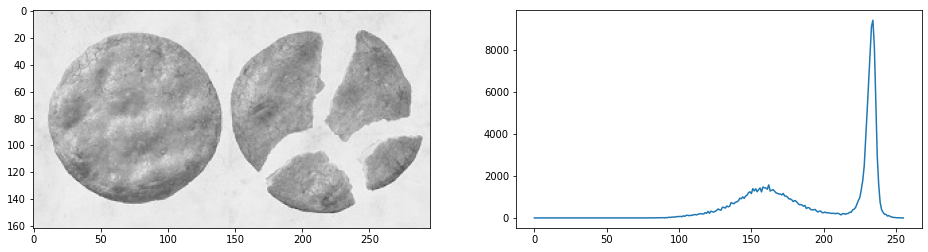

In [2]:
h()

## ＜しきい値の変更＞

In [3]:
threshold = widgets.IntSlider( value=160, min=0, max=255, step=1, description="しきい値:" )
widgets.interact( f, th=threshold )

interactive(children=(IntSlider(value=160, description='しきい値:', max=255), Output()), _dom_classes=('widget-int…

<function __main__.f>

## ＜コントラスト・明度の変更＞

In [4]:
alpha = widgets.FloatSlider( value=1.0, min=0, max=2.0, step=0.1, description="コントラスト:"  )
beta = widgets.FloatSlider( value=0.0, min=-100, max=100, step=1, description="明度:"  )
widgets.interact( g, a=alpha, b=beta )

interactive(children=(FloatSlider(value=1.0, description='コントラスト:', max=2.0), FloatSlider(value=0.0, descripti…

<function __main__.g>